# **Artificial Intelligence Meets Clinical Heath: Using Statistical Inference and Machine Learning to Identify High-Risk Patients**
**Competition - Reducing hospital readmissions**

Last updated: 3 March 2023

## **Introduction**

Hospital readmission (the return of a patient within a certain period due to the same disease following discharge) is a costly expenditure for both the patient and the hospital, and is used as a measure of quality of care in the United States (US). It also can be viewed as a repeated waste of medical resources that could otherwise be put to better use. According to research by Caughy et al (2017)^[1], hospital inpatient care for diabetic patients (a major non-communicable chronic disease affecting 11.3% of the US population^[2]) accounted for around 43% of total medical costs or 409 billion USD.

Whilst hospital readmission can due to a variety of reasons, including improper initial diagnoses, relapse and premature discharge, it has been found that not only are diabetic individuals at higher risk of readmission, a small reduction in the readmission rate could save over 1 billion USD annually[^3].

Since hospital readmissions are only increasing as the US population ages, and therefore becoming a growing economic burden on patients, hospital and public finance budgets, it is becomingly increasingly important to understand the critical factors contributing to readmission rates in order to proactively identify those inpatients most at risk of returning.

The authors used clinical and demographic information on 25,000 hospital patients to analyse the patterns of readmission. This included examining the top diagnosis by age group, the effect of a diabetes diagnosis, and the difference in readmission rates of the categorical variables.

The authors found that:

1. The most common primary diagnosis for every age group except for the 40-49 year-olds was circulatory. The most common primary diagnosis for 40-49 year-olds was "other" (that is, something other than diabetes, digestive, injury, muskoskeletal, respiratory or unknown).
2. The most common secondary and additional secondary diagnoses was again "other" for all age groups except for 70-79 year olds. The most common secondary diagnosis for 70-79 year olds was circulatory.
3. Diagnosis and readmission rates were significantly associated at a 95% confidence level; both overall and when the primary, secondary and additional secondary diagnoses were examined separately. Post-hoc tests between the average readmission rates of patients with a diabetes diagnosis compared to the average readmission rates for patients with a named non-diabetes diagnosis and unknown diagnosis indicated that the significance of the difference was mixed depending on the diagnosis type. For a primary diagnosis, the average readmission rates were higher for a named non-diabetes diagnosis, but for a secondary and additional secondary diagnosis, the average readmission rates were higher for a diabetes diagnosis. 
4. Preliminary correlation analysis indicated that the numeric variables with the strongest relationship to readmission status were the number of visits (inpatient, total, outpatient, emergency) in the year prior and whether or not a diabetes medication had been prescribed.
5. An polynomial support vector machine model could reasonably discriminate between patients that had and had not be readmitted to hospital. However, it did suffer from relatively low sensitivity, which means that out of every 100 patients actually readmitted, the model was only able to identify about 50% of them.
6. SHAP values indicated that the most important feature determining the likelihood of readmission was the number of inpatient visits, followed distantly by the number of emergency visits.

The authors recommend that:
1. The SVM model should be further refined before being used to help determine whether a patient is going to be readmitted in the near future.
2. The hospital should start with collecting more data relating to inpatient and emergency visits in order to help increase model performance.


---

[1]: Caughy, G.E., Pratt, N.L., Barratt, et al. (2017). Understanding 30-day re-admission after hospitalisation of older patients for diabetes: identifying those at greatest risk. Med J Aust; 206 (4): 170-175

[2]: American Diabetes Association (2013). Economic costs of diabetes in the U.S. in 2012. Diabetes Care; 36: 1033-1046

[3]: Shang, Y., Jiang, K., Wang, L. et al. (2021). The 30-days hospital readmission risk in diabetic patients: predictive modeling with machine learning classifiers. BMC Medical Informatics and Decision Making; 21 Supplement 2 (57)

## **Data and Methods**

The data used for the analysis consisted of ten years (1999 to 2008) of information on hospital patients from 130 US hospitals and integrated delivery networks (a total of 25,000 patients). It included information on 17 different attributes, including whether or not the patient was admitted to hospital, the age of the patient, the medical speciality of the admitting physician and the number of inpatient, outpatient and emergency visits in the year prior to hospitalisation.

Note that this was a subset of the source dataset, which included 100,000 observations and 55 different attributes that satisfied the following criteria:
- the patient was admitted to hospital
- the length of stay was between 1 and 14 days
- laboratory tests were performed on the patient
- medication/s were administered to the patient
- diabetes was listed as a diagnosis.

For more details on the variables in the dataset, please refer to Appendix A.

The analysis was divided up into three main sections. The aim of the first section was to explore the dataset and determine if there were any useful initial insights and to answer any specific descriptive questions in the analysis brief. The aim of the second section was to determine the extent of the relationship between a diabetes diagnosis and readmission rates (the second question). The aim of the third and final section was to model hospital readmission to determine if there were any variables particularly important to determining readmission rates and hence identify if there were specific groups of patients at higher risk of readmission. Five different model were tried: a logistic regression, a boosted tree, a random forest, a support vector machine and a neural network. The most promising models were tuned using bayes optimisation and a final selection made from those results. All models were optimised on sensitivity, given the presence of a reasonably balanced sample and the higher cost of false negatives relative to false positives. SHapley Additive exPlanation (SHAP) values were used to explore model feature importance and partial dependence.

See Appendix E for the analysis code.

## **Data Validation**

It was determined that apart from the explicit "Missing" label in medical_speciality, diag_1, diag_2 and diag_3, there were no other missing values.

In addition:
- medical_speciality, diag_1, diag_2 and diag_3 were all converted to unordered factors, and "Missing" was changed to "Unknown" and retained as a distinct category. The significant proportion of observations listed as "missing" in medical_speciality (49.5%) meant that it was going to be unwise to either drop these observations or attempt to impute them. In contrast, the diag_ variables had far fewer observations listed as "missing" (less than 1%), which meant that retaining them as a distinct category, imputation and removing them were all reasonable approaches.
- change, diabetes_med, glucose_test, A1Ctest and readmitted were all encoded as their numeric equivalents. The purpose of this was to enable exploration of the relationship of these variables with others using methods designed for numeric datatypes only, such as correlation analysis.
- age was encoded as its numeric equivalent using the mid-point of each category.
- several additional variables were created: n_visits - the sum of n_inpatient, n_outpatient and n_emergency, n_patient - the sum of n_inpatient and n_outpatient and n_diag - the number of non-unknown diagnoses, diabetes_diag - whether or not diabetes was listed as a diagnosis across any of the diagnosis variables, n_diabetes_diag - the number of times diabetes was listed as a diagnosis for an observation
- records for which all three diagnosis variables were listed as "Unknown" were removed.

In [1]:
install.packages(c("correlationfunnel", "DataExplorer", "ggstatsplot", "glmnet", "kernlab", "keras", "finetune", "fastshap", "shapviz"))
# install.packages(c("doMC", "vip", "DALEX", "ggpubr", "kernelshap"))

Installing correlationfunnel [0.2.0] ...
	OK [linked cache]
Installing DataExplorer [0.8.2] ...
	OK [linked cache]
Installing ggstatsplot [0.11.0] ...
	OK [linked cache]
Installing glmnet [4.1-6] ...
	OK [linked cache]
Installing kernlab [0.9-32] ...
	OK [linked cache]
Installing keras [2.11.0] ...
	OK [linked cache]
Installing finetune [1.0.1] ...
	OK [linked cache]
Installing fastshap [0.0.7] ...
	OK [linked cache]
Installing shapviz [0.5.0] ...
	OK [linked cache]


In [2]:
library(tidyverse)
library(tidymodels)
library(correlationfunnel)
library(GGally)
library(finetune)
library(fastshap)
library(shapviz)

# import the libraries with conflicts as namespaces
requireNamespace("skimr")
requireNamespace("DataExplorer")
requireNamespace("keras")
requireNamespace("ggstatsplot")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.3     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
extract_best_model <- function(results_rda, rank_metric = "roc_auc") {
    # this shows the best model's performance against all metrics
    best_model <- results_rda %>%
        rank_results(select_best = TRUE, rank_metric = rank_metric) %>%
        filter(rank == 1) %>%
        select(-c(.config, n, preprocessor, rank))
    # this shows the best model's performance against a specified metric
    best_model2 <- collect_metrics(results_rda) %>%
        filter(.metric == rank_metric) %>%
        arrange(desc(mean)) %>%
        dplyr::slice(1)
    # save the wflow_id in a parameter
    wflow_id = best_model2$wflow_id
    
    output <- list()
    output$best_model <- best_model
    output$best_model2 <- best_model2
    output$wflow_id <- wflow_id
    
    return(output)
}

In [4]:
readmissions <- readr::read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
# glimpse(readmissions)

In [5]:
string_to_binary <- function(x) {
    ifelse(x == "yes", 1, 0)
}

string_to_numeric <- function(x) {
    ifelse(x == "no", 0, ifelse(x == "normal", 1, 2))
}

replace_value <- function(x) {
    ifelse(x == "Missing", "Unknown", x)
}

convert_to_midpoint <- function(x) {
    case_when(x == "[40-50)" ~ 45,
              x == "[50-60)" ~ 55,
              x == "[60-70)" ~ 65,
              x == "[70-80)" ~ 75,
              x == "[80-90)" ~ 85,
              x == "[90-100)" ~ 95)
}

diag_count <- function(x) {
    ifelse(x == "Unknown", 0, 1)
}

diabetes_count <- function(x) {
    ifelse(x == "Diabetes", 1, 0)
}

readmissions <- readmissions %>%
    mutate(across(change:readmitted, string_to_binary),
           across(glucose_test:A1Ctest, string_to_numeric),
           across(medical_specialty:diag_3, replace_value),
           across(medical_specialty:diag_3, as.factor),
           age = convert_to_midpoint(age),
           n_visits = n_outpatient + n_inpatient + n_emergency,
           n_patient = n_outpatient + n_inpatient,
           n_diag = diag_count(diag_1) + diag_count(diag_2) + diag_count(diag_3),
           n_diabetes_diag = diabetes_count(diag_1) + diabetes_count(diag_2) + diabetes_count(diag_3),
           diabetes_diag = ifelse(diag_1 == "Diabetes" | diag_2 == "Diabetes" | diag_3 == "Diabetes", 1, 0))

## **Results and Analysis**


The patient's demographic data as well as the clinical records of drug use, lab procedures and admission history were visualised to build an initial picture of the dataset and determine if there were any important initial insights about the characteristics of readmitted patients compared to non-readmitted patients. The results are contained in Appendix B.

### **Top diagnosis by age group**

The report found that the most common primary diagnosis for every age group apart from 40-49 year-olds was circulatory. For that first group it was "other"; that is, something other than circulatory, diabetes, digestive, injury, muscoskeletal, respiratory or unknown. The analysis was also repeated for the secondary and additional secondary diagoses. In these cases, it was found that the most common diagnosis was "other" in all cases apart from the secondary diagnosis for 70 to 79 year olds (circulatory) and was listed as the diagnosis for between 34.4% and 43.3% of all records. Table 1 below displays the results for the primary diagnosis and Tables C.1 and C.2 in Appendix C contain the results for the secondary diagnoses.

In [6]:
options(dplyr.summarise.inform = FALSE)

age_readmissions <- readmissions %>%
    select(readmitted, age, starts_with("diag_")) %>%
    mutate(age = recode(age,
                        "45" = "40-49 years", "55" = "50-59 years", "65" = "60-69 years",
                        "75" = "70-79 years", "85" = "80-89 years", "95" = "90-99 years"),
           readmitted = recode(readmitted, "0" = "No", "1" = "Yes")) %>%
    pivot_longer(cols = starts_with("diag_"), names_to = "diag_type", values_to = "diagnosis") %>%
    group_by(age, diag_type, diagnosis) %>%
    summarise(n = n()) %>%
    group_by(age, diag_type) %>%
    mutate(prop = round(n / sum(n) * 100, 2))

get_top_diagnosis <- function(DIAG_TYPE = "diag_1") {
    top_diag <- age_readmissions %>%
        ungroup() %>%
        filter(diag_type == DIAG_TYPE) %>%
        select(-diag_type) %>%
        group_by(age) %>%
        top_n(1)
}

top_diag <- get_top_diagnosis()

Selecting by prop


**Table 1: Top primary diagnosis by age group**
| Age Group   | Diagnosis   | Count | Proportion Within Group (%) |
| ----------- | ----------- | ----- | --------------------------- |
| 40-49 years | Other       | 750   | 29.62                       |
| 50-59 years | Circulatory | 1,256 | 38.21                       |
| 60-69 years | Circulatory | 1,962 | 28.21                       |
| 70-79 years | Circulatory | 2,392 | 33.18                       |
| 80-89 years | Circulatory | 1,482 | 34.99                       |
| 90-99 years | Circulatory | 228   | 30.40                       |

### **The effect of a diabetes diagnosis on readmission**

The report investigated whether a diabetes diagnosis had an effect on readmission rates. For this section, every observation for each diagnosis variable was recoded as "Other" if the diagnosis was something other than diabetes or the diagnosis was unknown. An additional variable was also created that took a value of "Diabetes" for each instance in which at least one of the diagnoses was "Diabetes" and "Other" otherwise.

The report found that whilst the overall readmission rate across all observations was 47.0%, the readmission rates for a diabetes diagnosis ranged from 46.4% (primary) to 55.8% (secondary) compared to a range of 52.5% (additional secondary) to 53.5% (primary) for a non-diabetes diagnosis and up to 71.4% if the diagnosis was unknown. Interestingly, as Table 2 shows, the readmission rate for a primary diabetes diagnosis was slightly lower than that for a non-diabetes diagnosis. In all other cases it was higher.

**Table 2: Readmission rates by diagnosis variable**
| Diagnosis variable | Diabetes diagnosis | Non-diabetes diagnosis | Unknown diagnosis |
| -------------- | ------------------ | ---------------------- | ----------------- |
| Any            | 53.47              | 52.67                  | 68.00             |
| Primary        | 46.37              | 53.48                  | 50.00             |
| Secondary      | 55.85              | 52.60                  | 59.52             |
| Additional     | 54.31              | 52.53                  | 71.43             |

The readmission rates for the three groups were compared using a two-sided^[4] two-sample proportion test without Yates' continuity correction for small group sizes. This is equivalent to a chi-squared test of independence.

$\chi^2 = \sum\frac{(observed\;-\;expected)^2}{expected}$, where

$expected = \frac{column\;total\;\times\;row\;total}{N}$ and $degrees\;of\;freedom = (num\;rows-1)\;\times\;(num\;columns-1)$

As shown in Figure 1a, the significance test indicated that diagnosis and readmission rates were significantly associated $(\chi^2 = 5.99, p = 0.05)$. Post-hoc comparisons of readmission rates for a diabetes diagnosis compared (separately) to a non-diabetes and unknown diagnosis indicated that readmission rates were statistically similar between a diabetes and non-diabetes diagnosis $(\chi^2 = 1.45, p = 0.46)$ but marginally higher for an unknown diagnosis $(\chi^2 = 4.22, p = 0.08)$.

The analysis was repeated for each of the diagnosis types (primary, secondary and additional secondary):
- The significance test indicated that the primary diagnosis and readmission rates were significantly associated $(\chi^2 = 33.05, p = 0.00)$ (Figure 1b). Post-hoc comparisons of readmission rates for a diabetes primary diagnosis compared (separately) to a non-diabetes and unknown diagnosis indicated that readmission rates were higher for a non-diabetes primary diagnosis $(\chi^2 = 33.04, p = 0.00)$ but statistically similar between a diabetes and unknown diagnosis $(\chi^2 = 0.00, p = 1.00)$
- The significance test indicated that the secondary diagnosis and readmission rates were significantly associated $(\chi^2 = 11.65, p = 0.03)$ (Figure 1c). Post-hoc comparisons of readmission rates for a diabetes diagnosis compared (separately) to a non-diabetes and unknown diagnosis indicated that readmission rates were higher for a diabetes diagnosis $(\chi^2 = 10.93, p = 0.002)$ but statistically similar between a diabetes and unknown diagnosis $(\chi^2 = 0.23, p = 1.00)$.
- The significance test indicated that the additional secondary diagnosis and readmission rates were significantly associated $(\chi^2 = 31.43, p = 0.00)$ (Figure 1d). Post-hoc comparisons of readmission rates for a diabetes diagnosis compared (separately) to a non-diabetes and unknown diagnosis indicated that readmission rates were marginally lower for a non-diabetes primary diagnosis $(\chi^2 = 4.45, p = 0.07)$ but higher for a unknown diagnosis $(\chi^2 = 22.20, p = 0.00)$.

**Table 3: Chi-squared test of independence results**
| Diagnosis variable | Test 1 | Test 2a  | Test 2b   |
| ------------------ | ------ | -------- | --------- |
| Any                | *      | 0.8      | -14.53.   |
| Primary            | ***    | -7.11*** | -3.63     |
| Secondary          | *      | +3.25**  | -3.67     |
| Additional         | ***    | +1.78.   | -17.12*** |

---

[4]: A two-sided test was deemed most appropriate in this case as the researcher did not any pre-conceived assumptions about the direction of the relationship and no strong evidence-based reason to use a one-sided test.

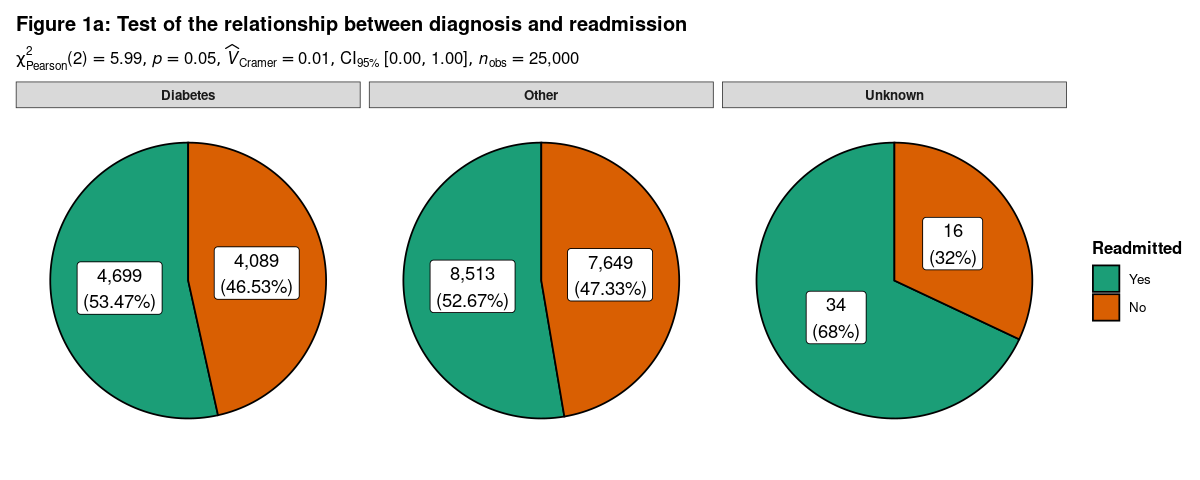

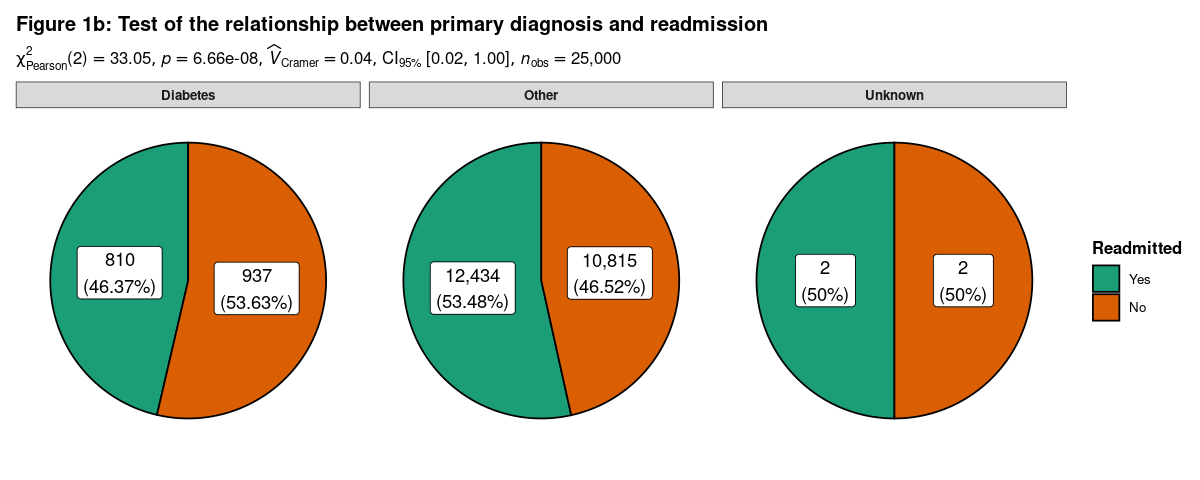

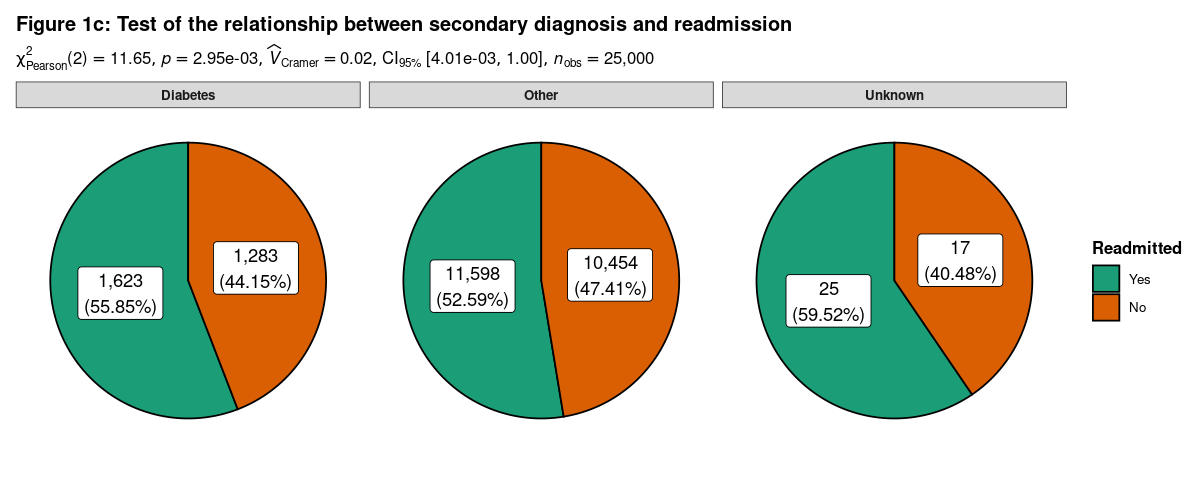

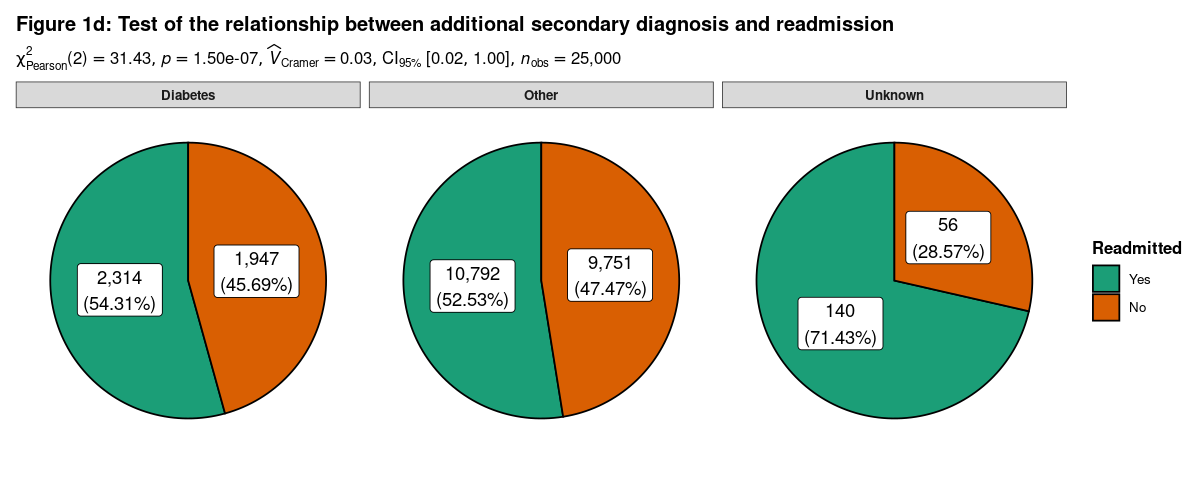

In [7]:
diabetes_or_else <- function(x, incl_unknown = TRUE) {
    if (incl_unknown == FALSE) {
        ifelse(x == "Diabetes", "Diabetes", "Other")
    } else {
        ifelse(x == "Diabetes", "Diabetes", ifelse(x == "Unknown", "Unknown", "Other"))
    }
}

readmission_rates <- readmissions %>%
    select(readmitted, starts_with("diag")) %>%
    mutate(readmitted = recode(readmitted, "0" = "Yes", "1" = "No"),
           diag = ifelse(diag_1 == "Diabetes" | diag_2 == "Diabetes" | diag_3 == "Diabetes", "Diabetes",
                         ifelse(diag_1 == "Unknown" | diag_2 == "Unknown" | diag_3 == "Unknown", "Unknown", "Other")),
           diag_12 = diabetes_or_else(diag_1),
           diag_22 = diabetes_or_else(diag_2),
           diag_32 = diabetes_or_else(diag_3))

# want to test whether the readmission rate for two groups are significantly different from each other
# Group 1: Diabetes diagnosis
# Group 2: Non-diabetes diagnosis
recode_diag = function(x) {
    recode(x, "Diabetes" = 1, "Other" = 0, "Unknown" = 0)
}

readmission_test <- readmission_rates %>%
    mutate(readmitted = recode(readmitted, "Yes" = 1, "No" = 0),
           diag = recode_diag(diag),
           diag_12 = recode_diag(diag_12),
           diag_22 = recode_diag(diag_22),
           diag_32 = recode_diag(diag_32))

options(repr.plot.width=10, repr.plot.height=4)
ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag,
           title = "Figure 1a: Test of the relationship between diagnosis and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag != "Unknown")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag), correct = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag != "Other")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag), correct = FALSE)

ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag_12,
           title = "Figure 1b: Test of the relationship between primary diagnosis and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag_12 != "Unknown")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_12), correct = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag_12 != "Other")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_12), correct = TRUE)

ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag_22,
           title = "Figure 1c: Test of the relationship between secondary diagnosis and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag_22 != "Unknown")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_22), correct = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag_22 != "Other")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_22), correct = FALSE)

ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag_32,
           title = "Figure 1d: Test of the relationship between additional secondary diagnosis and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag_32 != "Unknown")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_32), correct = FALSE)
# # readmission_rates2 <- readmission_rates %>% filter(diag_32 != "Other")
# # prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_32), correct = FALSE)

### Correlation analysis

The correlation analysis (Figures 2 and 3) indicated that whilst the value of the correlations was small, the variables most correlated with readmission were the total number of inpatient visits (n_inpatient), the total number of visits including and excluding emergency visits (n_visits and n_patient)^[6] followed by the followed by the number of outpatient visits (n_outpatient), emergency visits (n_emergency) and whether a diabetes medication was prescribed (diabetes_med).

Specifically, patients were likely to be readmitted if they had:
- had more than 1 inpatient or inpatient/outpatient visit
- had more than 2 visits including to emergency
- had any outpatient or emergency visits
- received diabetes medication during their stay

Patients were at lower risk of readmission if they had the opposite characteristics to those listed above, plus were prescribed 11 or fewer medications during their stay.

Figure 2 also indicated that the only moderately strong to strong linear relationships between the numeric explanatory variables were between the variables identifying how many visits and of which type the patient had had in the year prior. Whilst this should not be an issue for the random forest and neural network algorithms due to their design, it can affect the interpretation of a logistic regression model.

---

[6]: the strength of the relationships between readmission and n_visits and n_patient, appear to be driven by the relationship between readmission and n_inpatient.

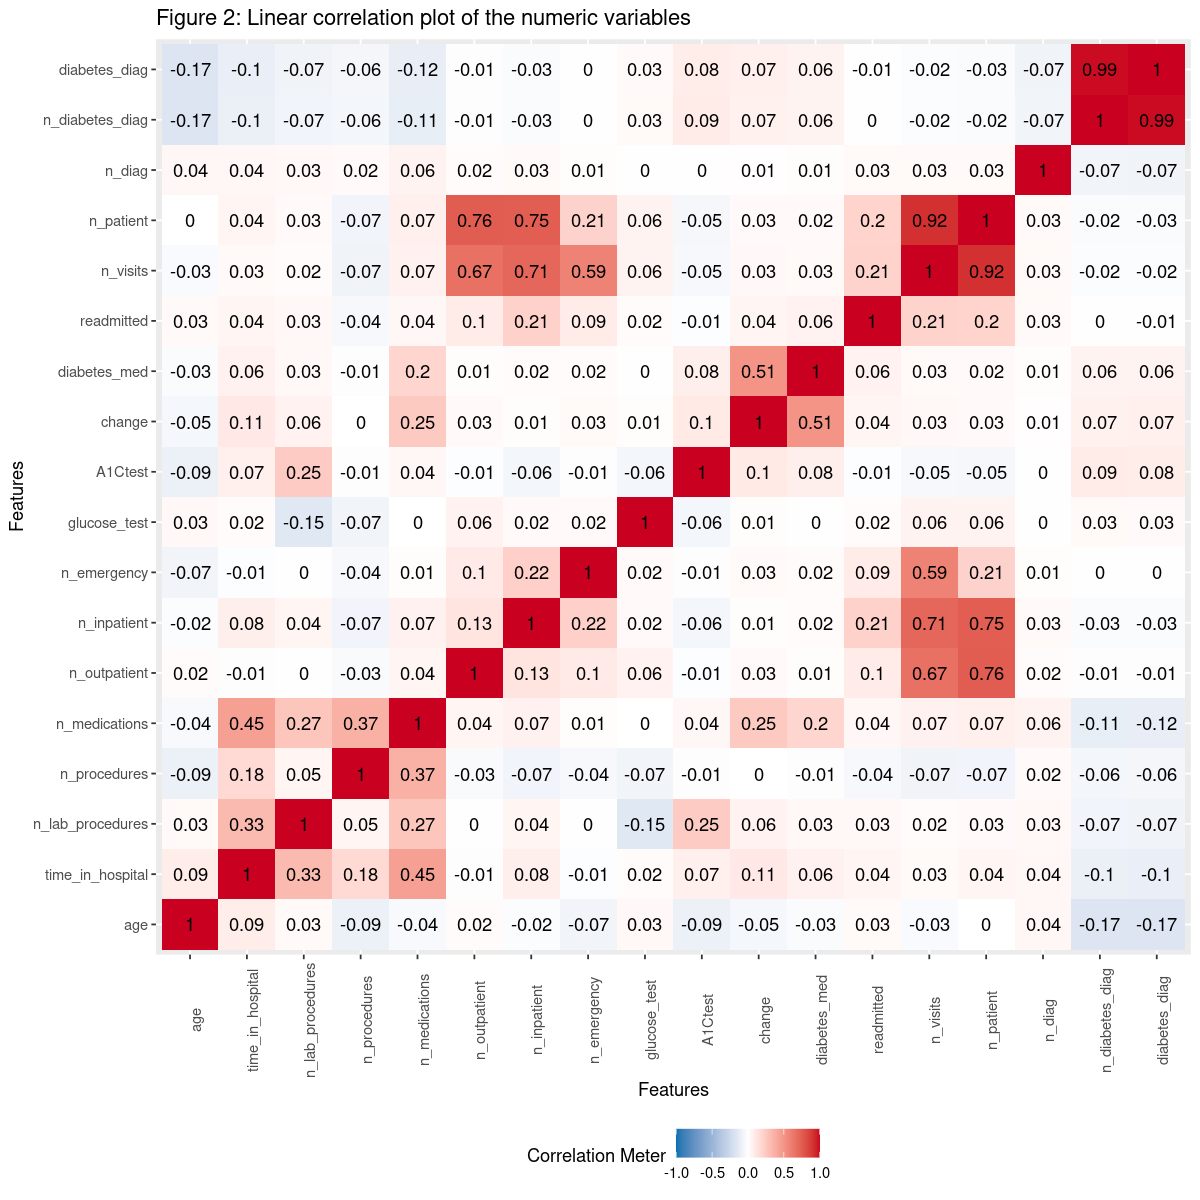

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
DataExplorer::plot_correlation(readmissions, type = "continuous", title = "Figure 2: Linear correlation plot of the numeric variables")

Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


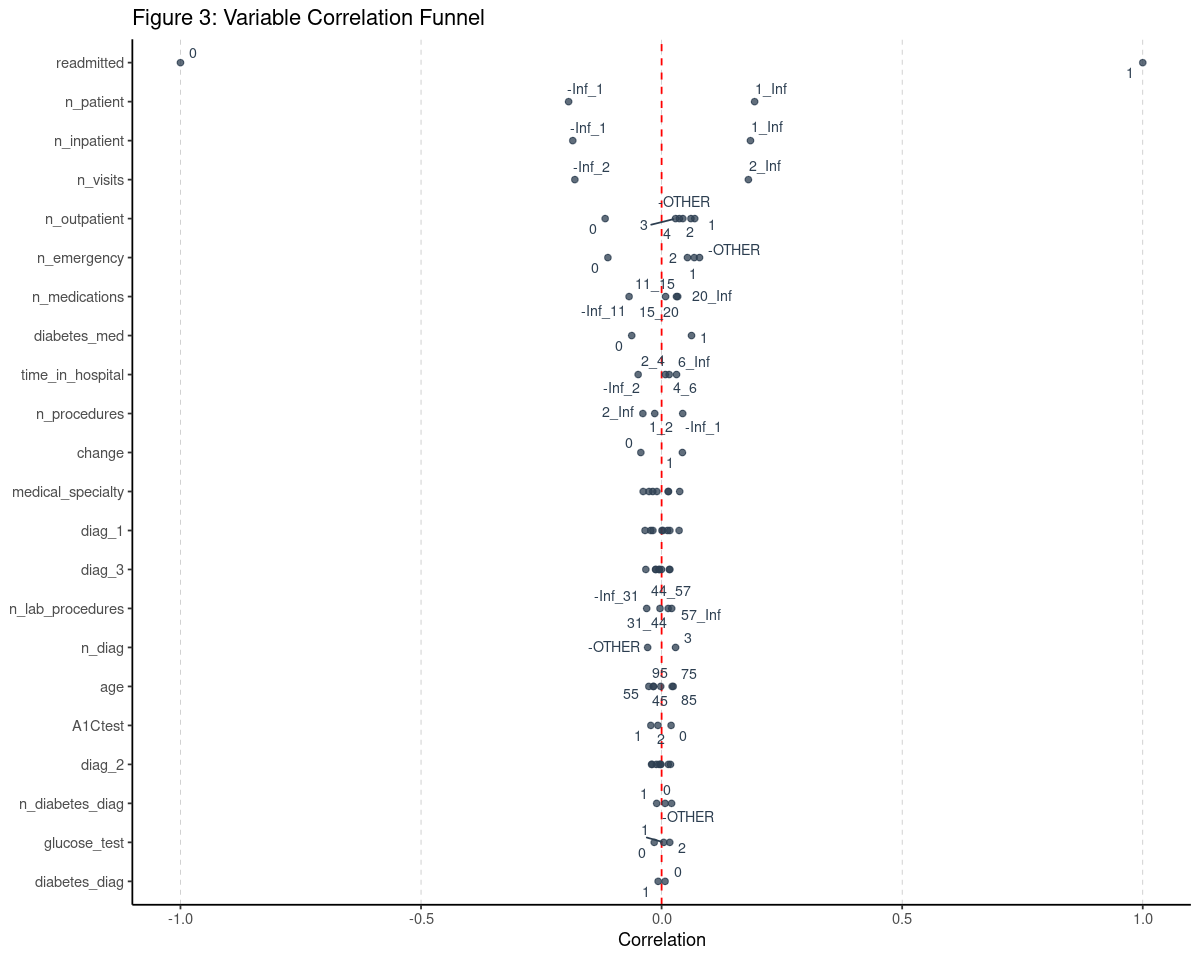

In [9]:
options(repr.plot.width=10, repr.plot.height=8)
readmissions %>%
    binarize() %>%
    # glimpse()
    correlate(target = readmitted__1) %>%
    plot_correlation_funnel(alpha = 0.75) +
    labs(x = "Correlation", y = NULL, title = "Figure 3: Variable Correlation Funnel") +
    theme_classic() +
    theme(panel.grid.major.x = element_line(color = "grey", linewidth = 0.2, linetype = "dashed"))

### **Statistical inference**

Note that due to extensive analysis of the diagnosis variables in the section immediately preceding this one, these variables were not included in the set of variables analysed in this subsection of the report.

A range of hypothesis tests were used to assess the statistical significance of the relationship between readmission rates and each of the individual predictors. These included chi-squared tests of independence/proportion tests and post-hoc tests for the categorical and binary predictors, and simple logistic regression for the continuous predictors. Details of the results can be found in Appendix D and a summary is found in Table 4 below. The table indicates that all the variables (except for the number of diabetes diagnoses) appeared to be individually important in determining readmission, but this conclusion changed once all variables were included in a single predictive model.

**Table 4: Hypothesis test results for each explanatory variable against readmitted**

Predictor type | Predictor         | Coefficiant | p_value | 
| ------------ | ----------------- | ----------- | ------- | 
| Categorical  | medical_specialty | 85.51       | 0.00*** |
| or           | glucose_test      | 7.75        | 0.02**  |
| binary       | A1Ctest           | 14.83       | 0.00*** |
|              | change            | 46.69       | 0.00*** |
|              | diabetes_med      | 96.55       | 0.00*** |
| Continuous   | age               | 4.79        | 0.00*** | 
| numeric      | time_in_hospital  | 6.81        | 0.00*** | 
|              | n_lab_procedures  | 1.89        | 0.00*** |
|              | n_procedures      | -7.022      | 0.00*** |
|              | n_medications     | 5.82        | 0.00*** |
|              | n_outpatient      | 14.45       | 0.00*** |
|              | n_inpatient       | 31.49       | 0.00*** |
|              | n_emergency       | 16.08       | 0.00*** |
|              | n_visits          | 31.43       | 0.00*** |
|              | n_patient         | 30.62       | 0.00*** |
|              | n_diag            | 4.52        | 0.00*** |
|              | n_diabetes_diag   | -0.62       | 0.53    |

### **Modelling**

In [10]:
set.seed(23)
train_test_split <- initial_split(readmissions, prop = 0.8)

all_train_data <- training(train_test_split)
test_data <- testing(train_test_split)

# five-fold cross-validation repeated twice
readmission_folds <- vfold_cv(all_train_data, v = 5, repeats = 2)

In [11]:
# parallel::detectCores()
# doMC::registerDoMC(cores = 15)

In [12]:
## Assessment of initial results
# load the results optimised on recall
# files <- c('logreg_results.rda', 'gbm_results.rda', 'rf_results.rda', 'svm_results.rda', 'nn_results.rda')

# for (file in files) {
#     load(file)
# }

# # select best model based on recall
# lr_output <- extract_best_model(logreg_results, rank_metric = "sens")
# gbm_output <- extract_best_model(gbm_results, rank_metric = "sens")
# rf_output <- extract_best_model(rf_results, rank_metric = "sens")
# svm_output <- extract_best_model(svm_results, rank_metric = "sens")
# nn_output <- extract_best_model(nn_results, rank_metric = "sens")

# initial_perf_df <- rbind(lr_output$best_model, gbm_output$best_model, rf_output$best_model, svm_output$best_model, nn_output$best_model)

# initial_perf_df %>%
#     filter(.metric == "roc_auc") %>%
#     arrange(desc(mean))

# initial_perf_df %>%
#     filter(.metric == "sens") %>%
#     arrange(desc(mean))

# initial_perf_df %>%
#     filter(.metric == "spec") %>%
#     arrange(desc(mean))

# initial_perf_df %>%
#     filter(.metric == "precision") %>%
#     arrange(desc(mean))

# the best model overall is the xgboost (but only by a little). The svm has the best sensitivity.

In [13]:
## Assessment of Tuned Results
# files <- c('logreg_results_bayes.rda', 'gbm_results_bayes.rda', 'svm_results_bayes.rda')

# for (file in files) {
#     load(file)
# }

# lr_tuned_output <- extract_best_model(logreg_results, rank_metric = "sens")
# gbm_tuned_output <- extract_best_model(gbm_results, rank_metric = "sens")
# svm_tuned_output <- extract_best_model(svm_results, rank_metric = "sens")
# lr_tuned_output
# gbm_tuned_output
# svm_tuned_output

Of the five initial models trained, the boosted tree and support vector machine were selected as candidates for further tuning due to their decent performance across all metrics (auc score or concordance-statistic (c-statistic), sensitivity, specificity and precision). Once tuned, the final model selected was the support vector machine., which was able to achieve a c-statistic of 0.65 on the training data and similar performance on the test data. Despite the optimisation metric being sensitivity, the support vector machine still only had a middling score. A value of 0.51 or 0.52 indicated that only just over 50% of all patients actually readmitted were correctly identified by the model. With respect to the other metrics, a specificity score of 0.69-0.70 indicated that about 70% of all patients not readmitted were correctly identified, and a precision score of 0.59 to 0.60 indicated that 60% of all predicted readmissions actually were readmitted (and the other 40% were not).

**Table 5: Shortlisted model performance metrics**

| Model                  | Data     | C-statistic | Sensitivity | Specificity | Precision | 
| ---------------------- | -------- | ----------- | ----------- | ----------- | --------- | 
| Boosted tree           | Training | 0.6171      | 0.5310      | 0.6370      | 0.5666    |
|                        | Test     | 0.6610      | 0.4858      | 0.7388      | 0.6161    |
|                        |          |             |             |             |           |
| Support vector machine | Training | 0.6477      | 0.5143      | 0.6918      | 0.5990    |
|                        | Test     | 0.6535      | 0.5220      | 0.6960      | 0.5970    |

In [14]:
## Final model selection
load(file = 'svm_results_bayes.rda')
final_results <- svm_results
final_model <- extract_best_model(final_results, rank_metric = "sens")
wflow_id = final_model$wflow_id

# extract workflow for the 'best' model variant
best_wflow <- final_results %>% extract_workflow(id = wflow_id)
# extract tuning results
best_params <- final_results %>%
    extract_workflow_set_result(id = wflow_id) %>%
    select_best(metric = "sens")
# update the workflow with the best parameters
final_wflow <- best_wflow %>% finalize_workflow(best_params)
# final_wflow

# fit the model to all training data (train and validation sets)
model_final_fit <- final_wflow %>%
    last_fit(split = train_test_split,
             metrics = metric_set(sens, roc_auc, spec, precision))
# model_final_fit$.workflow

# # assess model performance on the test set
# collect_metrics(model_final_fit) %>%
#     dplyr::select(-c(.estimator, .config)) %>% 
#     mutate(.estimate = round(.estimate, 4))

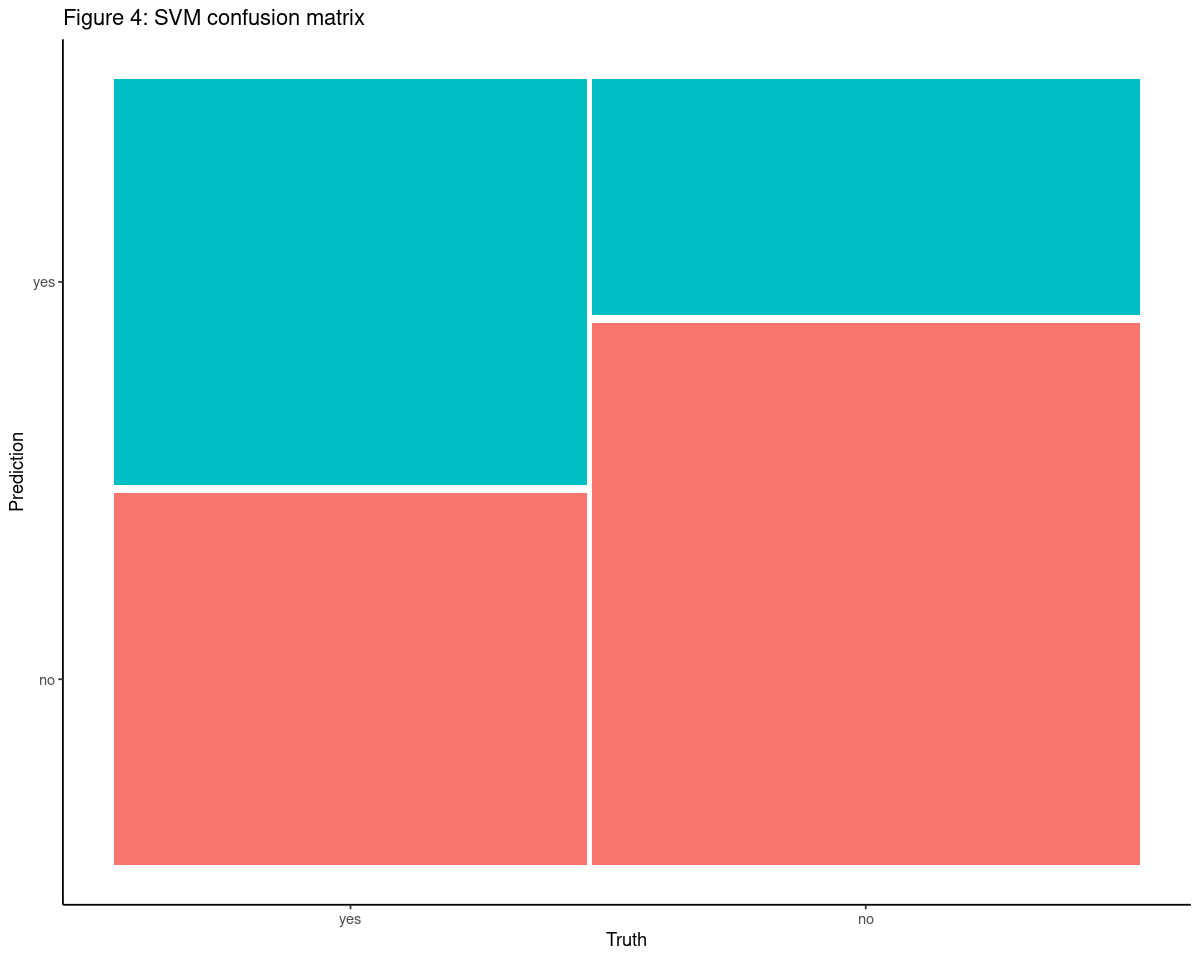

In [15]:
# visualise a confusion matrix
cm <- model_final_fit %>%
    collect_predictions() %>%
    conf_mat(readmitted, .pred_class)
autoplot(cm, type = "mosaic") +
aes(fill = rep(colnames(cm$table), nrow(cm$table))) +
guides(fill = "none") +
labs(title = "Figure 4: SVM confusion matrix") +    
theme_classic()

Figure 4 shows the confusion matrix for the support vector machine model, which confirms the figures in Table 5. The model was able to correctly identify readmitted patients about 50% of the time, and non-readmitted patients about 70% of the time.

In [16]:
# extract the model object
svm_model_obj <- extract_fit_engine(model_final_fit)
parsnip_model_obj <- extract_fit_parsnip(model_final_fit)

# transform the features according to the model recipe
prepped_model_recipe <- extract_recipe(model_final_fit)
preproc_train_data <- bake(prepped_model_recipe, 
                           has_role("predictor"),
                           new_data = all_train_data)
preproc_train_data$readmitted <- all_train_data$readmitted
preproc_test_data <- bake(prepped_model_recipe,
                          has_role("predictor"),
                          new_data = test_data)
preproc_test_data$readmitted <- test_data$readmitted

# extract the prediction probabilities for the positive class
pfun <- function(model, newdata) {
    kernlab::predict(model, newdata, type = "probabilities")[, 1]
}

preproc_train_data_small <- preproc_train_data %>%
    group_by(readmitted) %>%
    sample_n(size = 500) %>%
    ungroup()
preproc_train_X <- preproc_train_data_small %>%
    select(-readmitted)
preproc_train_X <- data.frame(preproc_train_X)

# create an explainer
shap_explainer <- fastshap::explain(svm_model_obj, X = preproc_train_X, nsim = 5, pred_wrapper = pfun)
# create a shapviz object
sv_svm <- shapviz(shap_explainer, X = preproc_train_X)

Figure 5 shows a SHAP feature importance plot. The width of the dots indicate the relative importances of each feature and the colour indicates the relative impact of that feature on the outcome variable (in this case, readmission). For example, more in- or outpatient visits increase the probability of readmission, and fewer visits decrease the probability. This figure indicates that the most important factor related to the likelihood of readmission is the number of inpatient visits, followed distantly by the number of emergency visits. Interestingly, the next most important feature, n_procedures, showed the opposite relationship: more procedures during the visit meant that it was less likely a patient would be readmitted.

The partial dependence plots in Figures 6a to 6d more clearly indicate the relationship between readmission and different values of n_patient, n_inpatient, n_emergency and n_procedures.

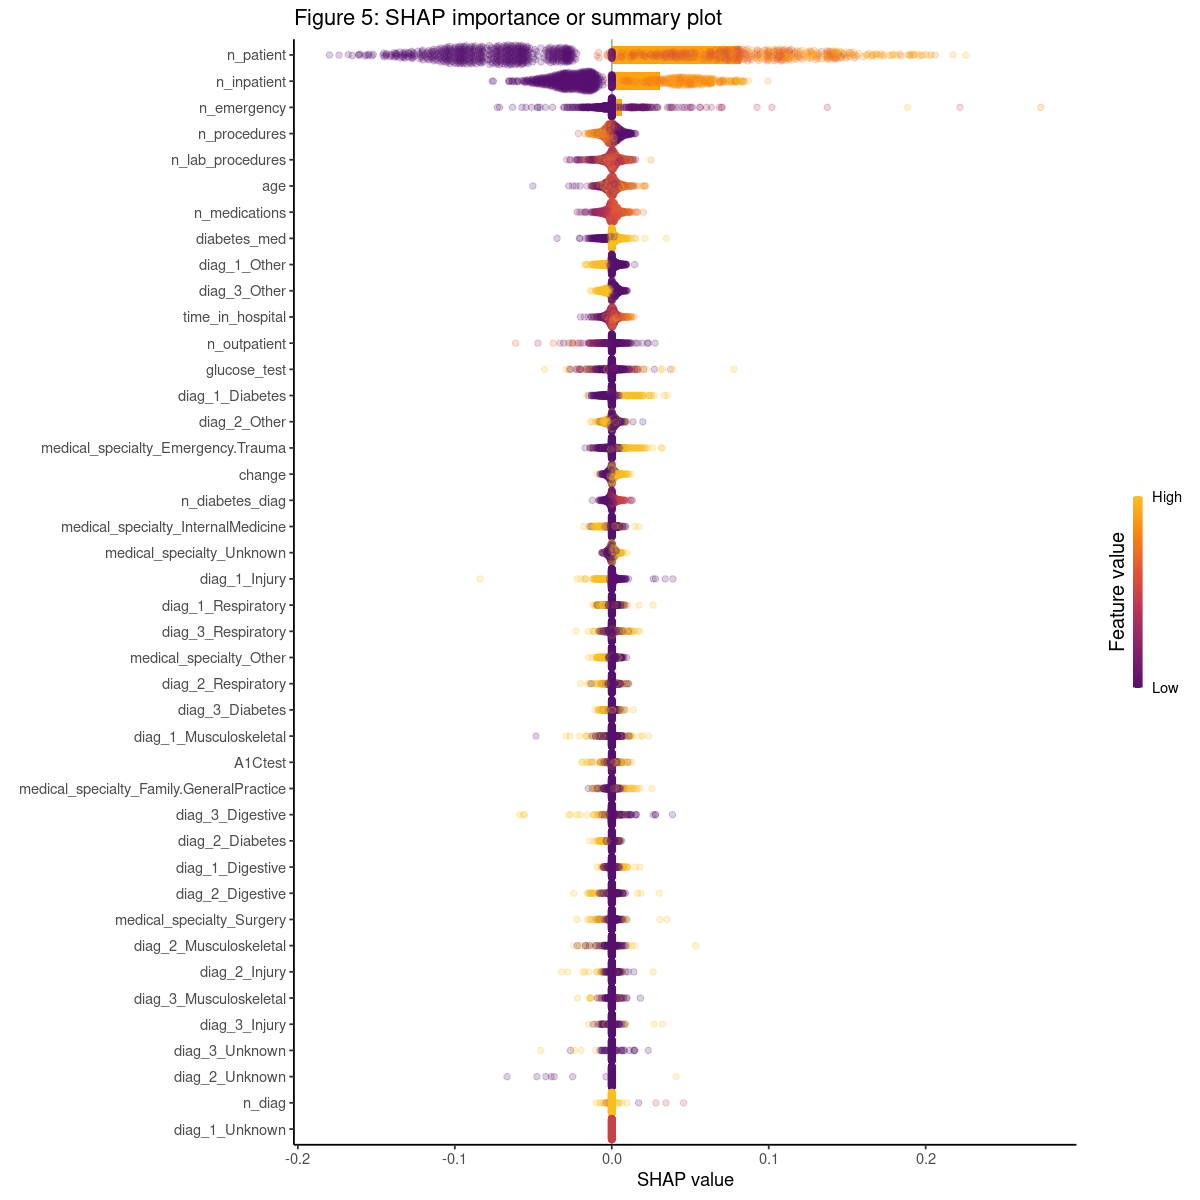

In [17]:
# variable importance/beeswarm plot
options(repr.plot.width=10, repr.plot.height=10)
sv_importance(sv_svm, kind = "both", show_numbers = FALSE, alpha = 0.2, max_display = Inf) +
    labs(title = "Figure 5: SHAP importance or summary plot") +
    theme_classic()

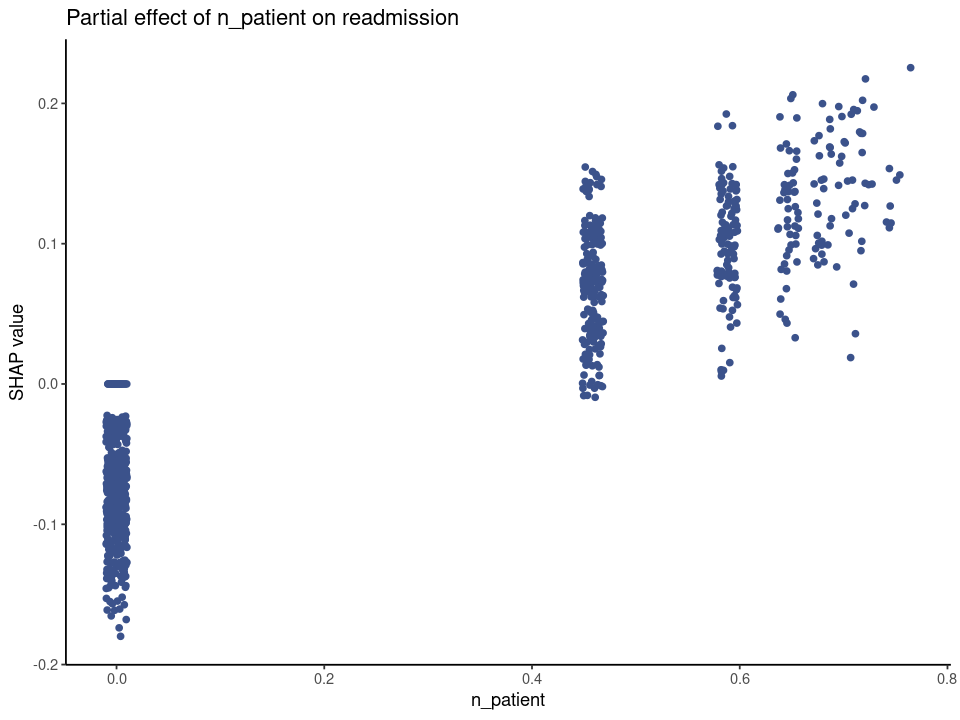

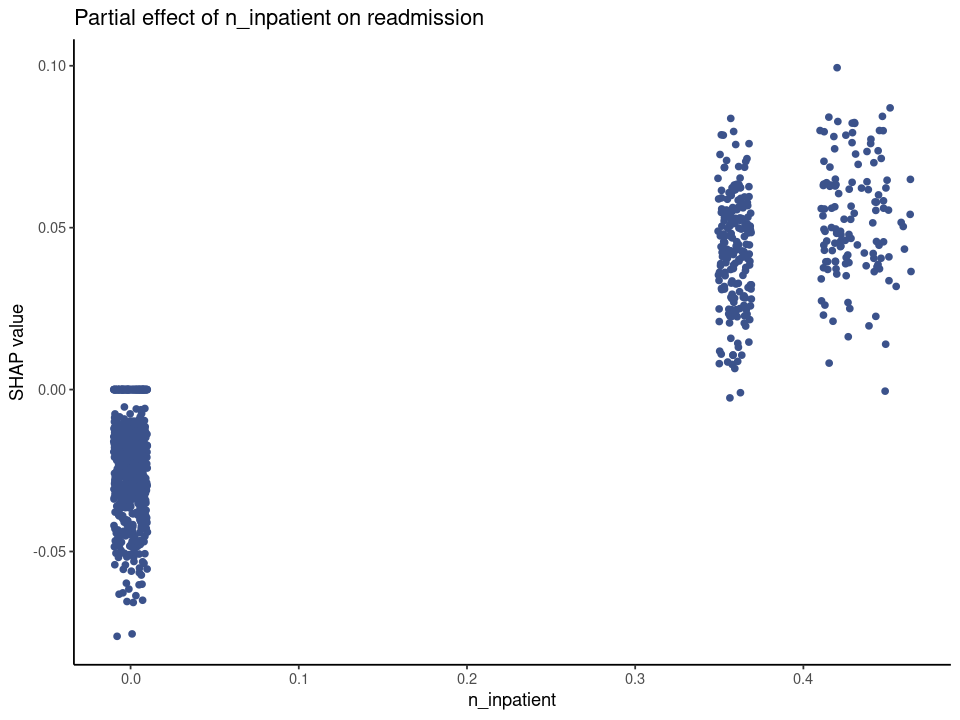

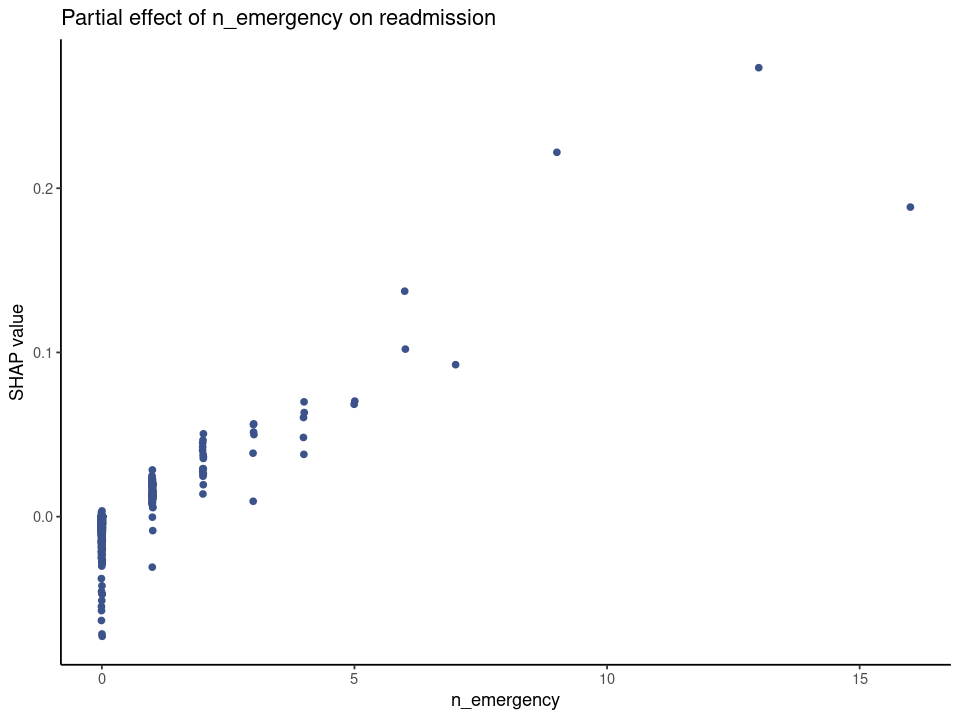

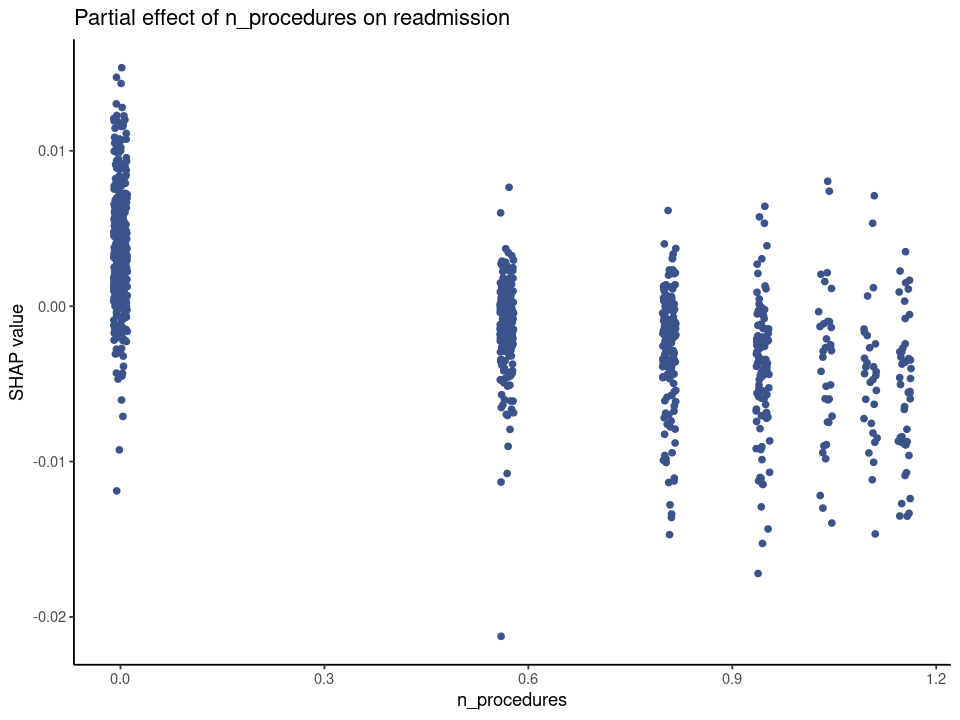

In [18]:
# loop over dependence plots in decreasing importance
options(repr.plot.width=8, repr.plot.height=6)
for (v in c('n_patient', 'n_inpatient', 'n_emergency', 'n_procedures')) {
    p <- sv_dependence(sv_svm, v, jitter_width = 0.01) +
        labs(title = paste0("Partial effect of ", v, " on readmission"),
             y = "SHAP value") + 
        theme_classic()
    print(p)
}

Figures 7a and 7b below show a waterfall plot and a force plot for a randomly chosen patient that was actually readmitted and a randomly chosen patient that was actually not readmitted. These plots indicate the additive contributions of each feature to the final prediction. With a more refined model, they could provide important insights for medical and administrative staff into the characteristics of high-risk patients. The plots also demonstrate how the readmission risk of new patients could be assessed once sufficient information had been collected. The colour and direction of the arrow indicates whether each feature is having a positive or negative effect on the probability of readmission, and the size of the arrow indicates the magnitude of that impact.

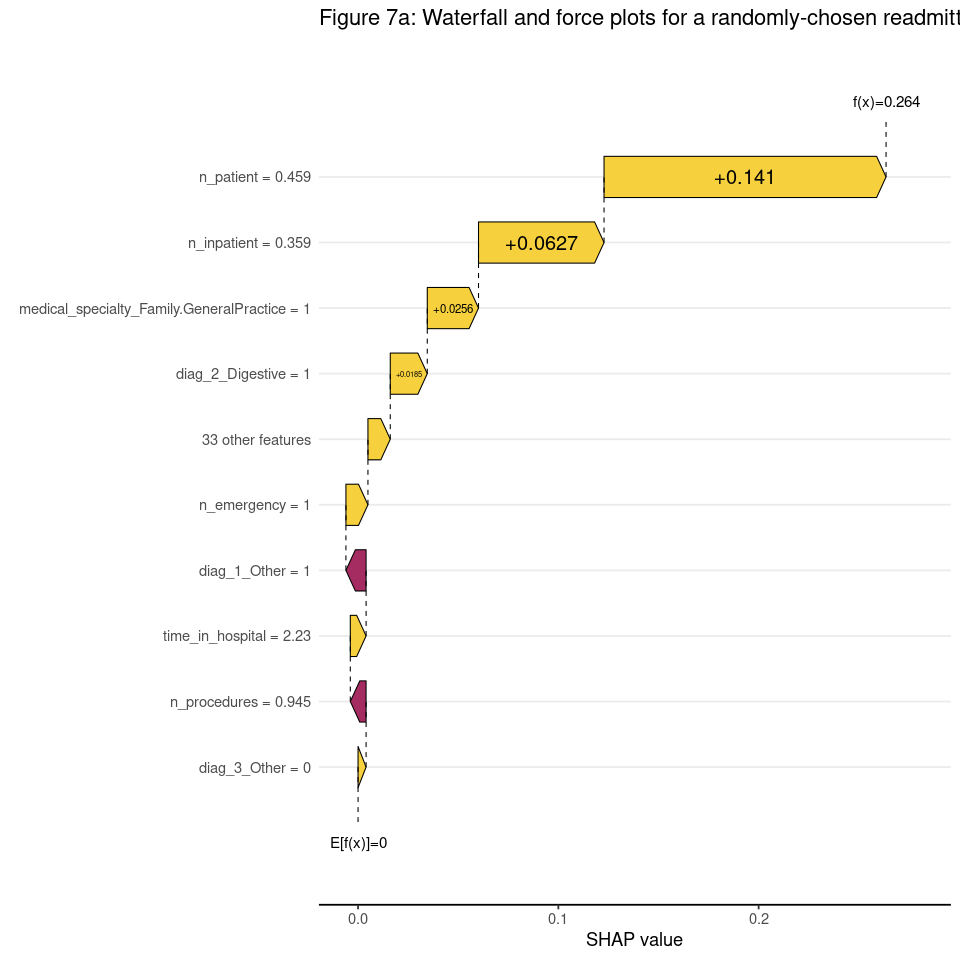

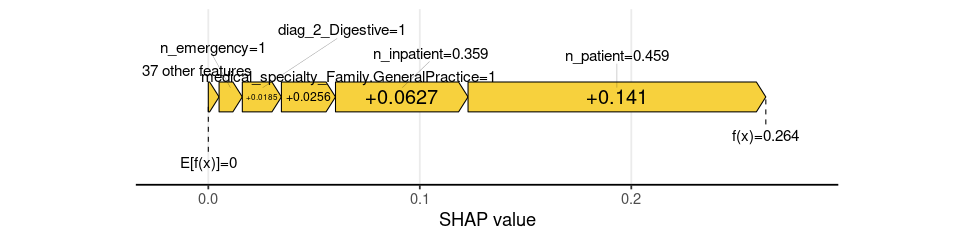

In [22]:
# pick a random readmitted patient from the data
# note that the second half are readmitted patients
readmitted <- preproc_train_data_small %>% filter(readmitted == 1) %>% select(-readmitted)
patient_num <- as.integer(runif(n = 1, min = 0, max = 1) * nrow(readmitted) + 500)

# plot a waterfall / force plot
options(repr.plot.width=8, repr.plot.height=8)
sv_waterfall(sv_svm, row_id = patient_num, max_display = 10) + labs(title = "Figure 7a: Waterfall and force plots for a randomly-chosen readmitted patient")
options(repr.plot.width=8, repr.plot.height=2)
sv_force(sv_svm, row_id = patient_num, max_display = 6)

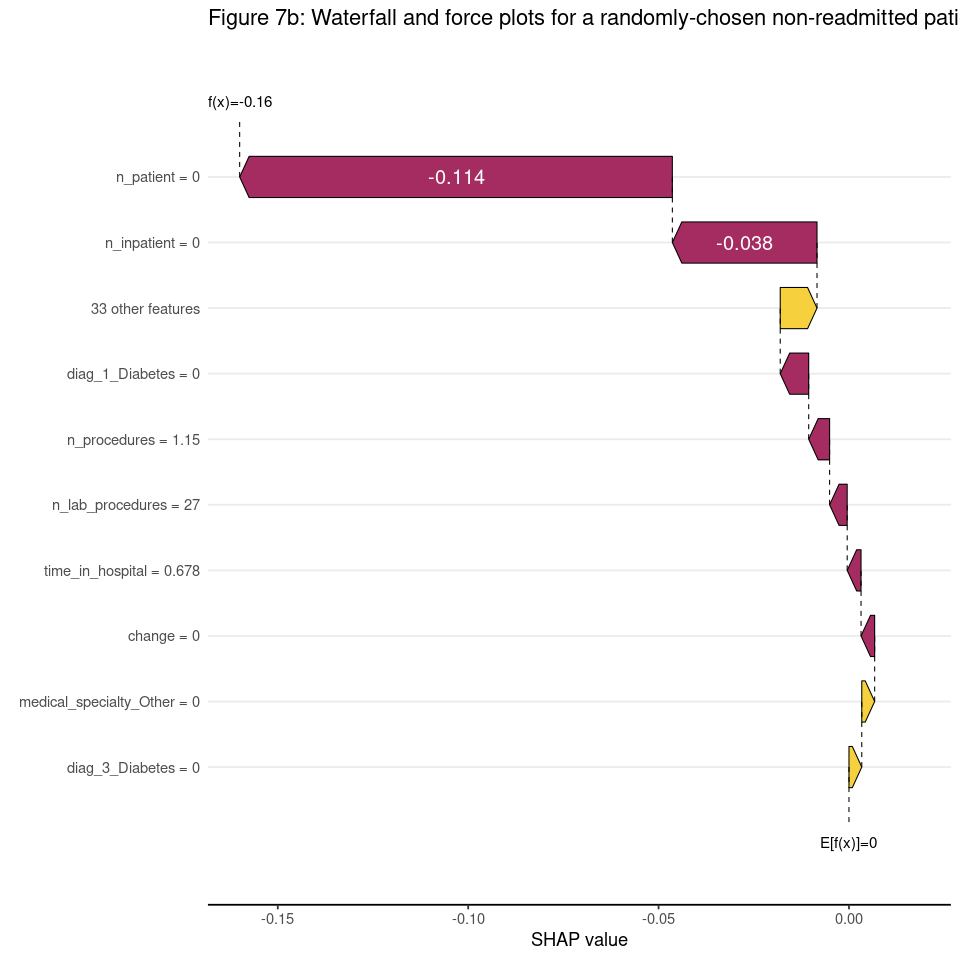

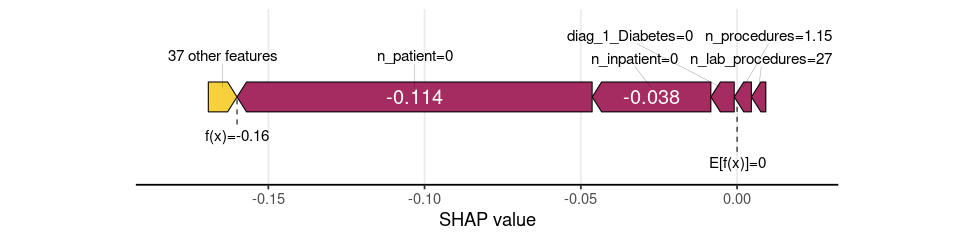

In [21]:
# pick a random not-readmitted patient from the data
non_readmitted <- preproc_train_data_small %>% filter(readmitted == 0) %>% select(-readmitted)
patient_num <- as.integer(runif(n = 1, min = 0, max = 1) * nrow(readmitted))

# plot a waterfall / force plot
options(repr.plot.width=8, repr.plot.height=8)
sv_waterfall(sv_svm, row_id = patient_num, max_display = 10) + labs(title = "Figure 7b: Waterfall and force plots for a randomly-chosen non-readmitted patient")
options(repr.plot.width=8, repr.plot.height=2)
sv_force(sv_svm, row_id = patient_num, max_display = 6)

## **Appendix A - Competition Brief**

**Reducing hospital readmissions**

**📖 Background**

You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

**💾 The data**
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

*Information in the file*
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [5]:
suppressPackageStartupMessages(library(tidyverse))
readmissions <- readr::read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
head(readmissions)

**💪 Competition challenge**

Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

**🧑‍⚖️ Judging criteria**

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

**✅ Checklist before publishing into the competition**
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## **Appendix B - Dataset Characteristics**

In [23]:
skimr::skim(readmissions)

── Data Summary ────────────────────────
                           Values      
Name                       readmissions
Number of rows             25000       
Number of columns          22          
_______________________                
Column type frequency:                 
  factor                   4           
  numeric                  18          
________________________               
Group variables            None        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate ordered n_unique
1 medical_specialty         0             1 FALSE          7
2 diag_1                    0             1 FALSE          8
3 diag_2                    0             1 FALSE          8
4 diag_3                    0             1 FALSE          8
  top_counts                                 
1 Unk: 12382, Int: 3565, Oth: 2664, Eme: 1885
2 Cir: 7824, Oth: 6498, Res: 3680, Dig: 2329 
3 Oth: 9056, Cir: 8134, Dia: 2906,

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 15 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,factor,medical_specialty,0,1,FALSE,7,"Unk: 12382, Int: 3565, Oth: 2664, Eme: 1885",NA,NA,NA,NA,NA,NA,NA,NA
2,factor,diag_1,0,1,FALSE,8,"Cir: 7824, Oth: 6498, Res: 3680, Dig: 2329",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,diag_2,0,1,FALSE,8,"Oth: 9056, Cir: 8134, Dia: 2906, Res: 2872",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,diag_3,0,1,FALSE,8,"Oth: 9107, Cir: 7686, Dia: 4261, Res: 1915",NA,NA,NA,NA,NA,NA,NA,NA
5,numeric,age,0,1,NA,NA,NA,68.44120,13.1563318,45,55,65,75,95,▇▇▇▅▁
6,numeric,time_in_hospital,0,1,NA,NA,NA,4.45332,3.0014699,1,2,4,6,14,▇▆▂▁▁
7,numeric,n_lab_procedures,0,1,NA,NA,NA,43.24076,19.8186202,1,31,44,57,113,▃▇▇▂▁
8,numeric,n_procedures,0,1,NA,NA,NA,1.35236,1.7151793,0,0,1,2,6,▇▂▁▁▁
9,numeric,n_medications,0,1,NA,NA,NA,16.25240,8.0605318,1,11,15,20,79,▇▅▁▁▁


In [66]:
# create_report(readmissions, y = "readmitted", output_file = "eda_report")

The bar plots below show the standardised proportion of observations by readmission status and unique value for each (unordered) categorical or binary variable in the dataset. It broadly shows that there appears to be no clear relationship between any of these variables and readmission. That being said, the proportion of those readmitted:
- increased slightly with age
- was highest when the admitting physician had an unknown, family/general practice or emergency/trauma medical specialty
- highest when diabetes was the first diagnosis, circulatory was the secondary diagnosis and diabetes, circulatory or digestive was the additional secondary diagnosis or in general higher if diabetes was not listed as a diagnosis
- highest when no A1C test had been performed
- higher if there had been a change to the diabetes medication
- higher if diabetes medication had been prescribed.

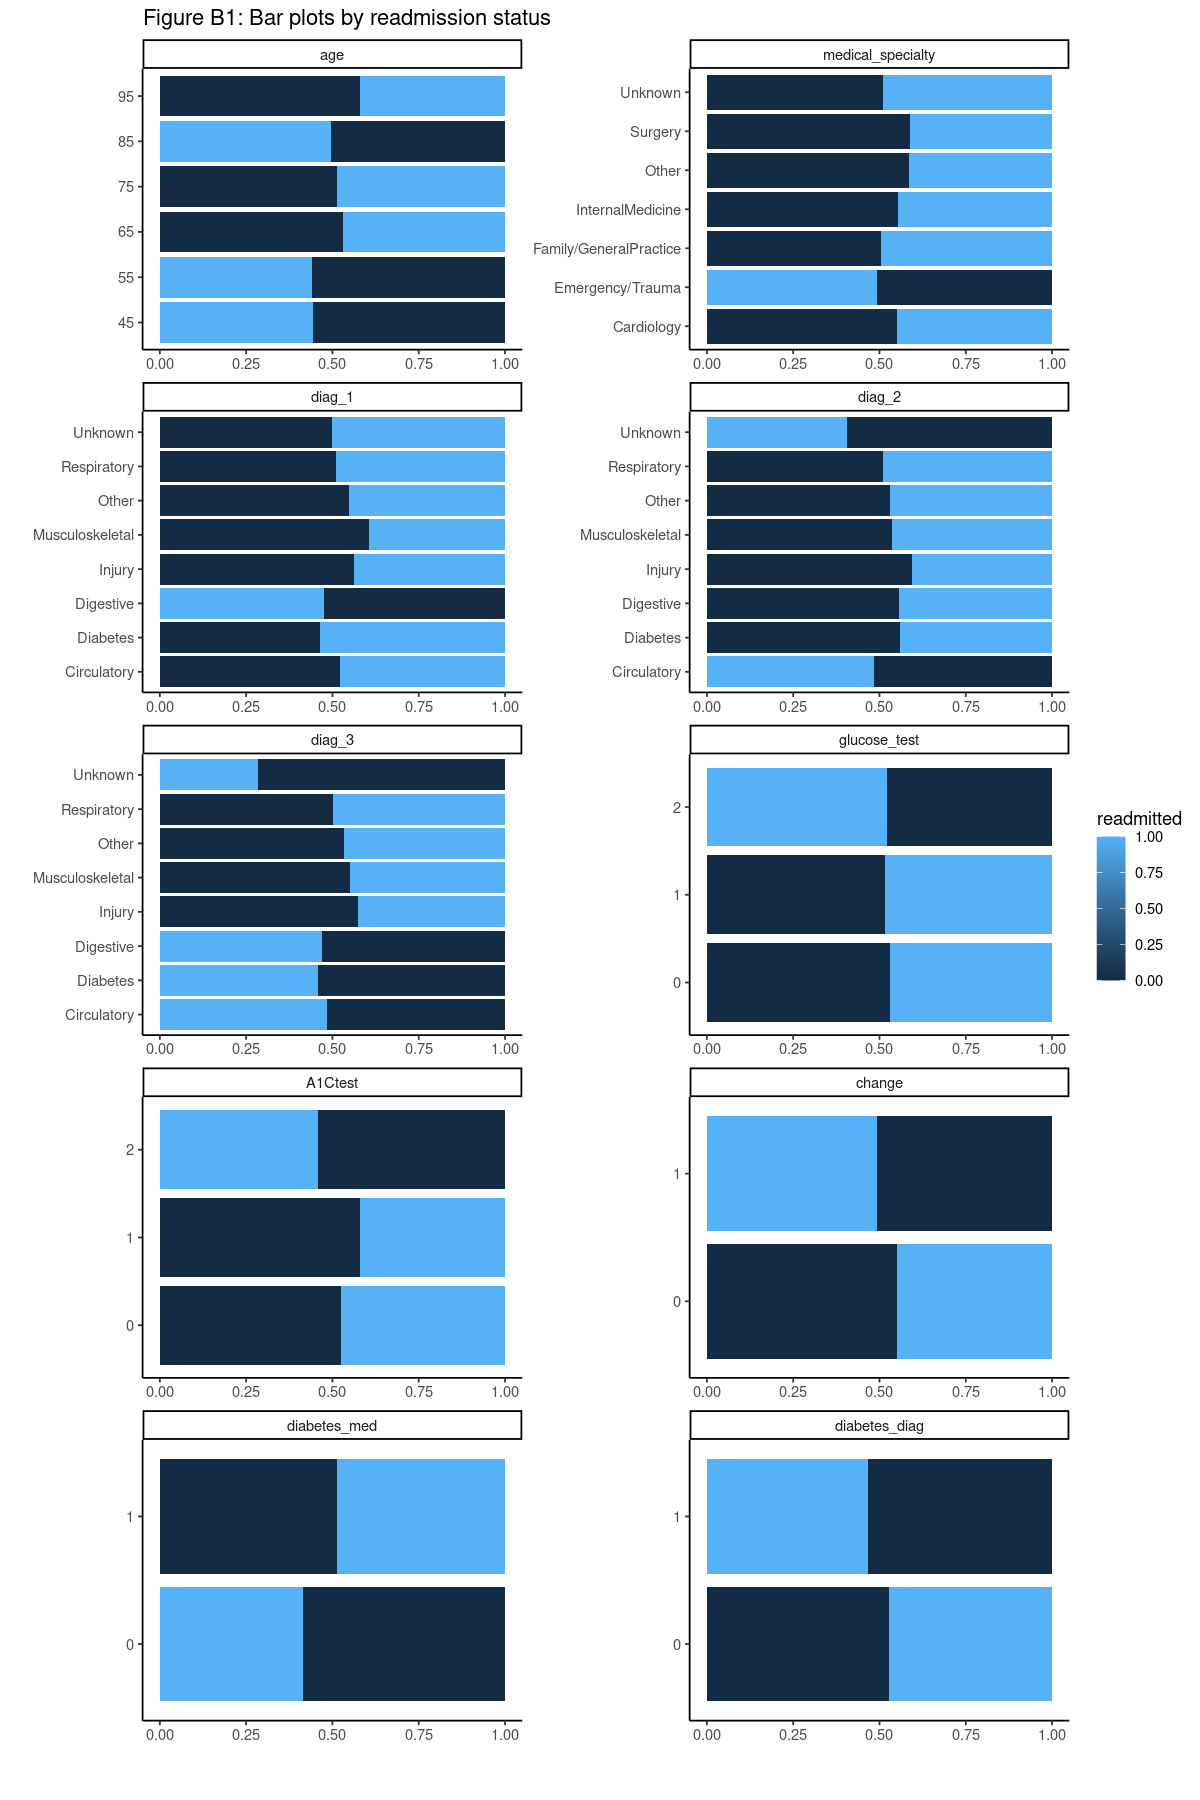

In [28]:
options(repr.plot.width=10, repr.plot.height=15)
plot_data <- readmissions %>%
    mutate(age = factor(age, ordered = TRUE),
           glucose_test = factor(glucose_test, ordered = TRUE),
           A1Ctest = factor(A1Ctest, ordered = TRUE))

DataExplorer::plot_bar(plot_data, by = "readmitted", order_bar = FALSE,
         ncol = 2, nrow = 6, ggtheme = theme_classic(),
         title = "Figure B1: Bar plots by readmission status",
         by_position = "fill")

The plots below show the distribution of observations across the different values of each variable, including the target/outcome variable. Importantly, it indicates that the proportion of observations across the two readmission classes were approximately equal, which meant that no adjustment for imbalanced classes had to be made in the predictive modelling section of this analysis.

In terms of the other variables, the plots indicated that:
- the largest proportions of patients were aged between 60 and 80 years
- the medical specialty of the admitting physician was generally unknown
- the primary, secondary and additional secondary diagnoses tended to be circulatory or other (that is, NOT diabetes)
- glucose and A1C tests were generally NOT performed
- diabetes medications generally HAD been prescribed
- diabetes was NOT listed as a diagnosis for two-thirds of patients

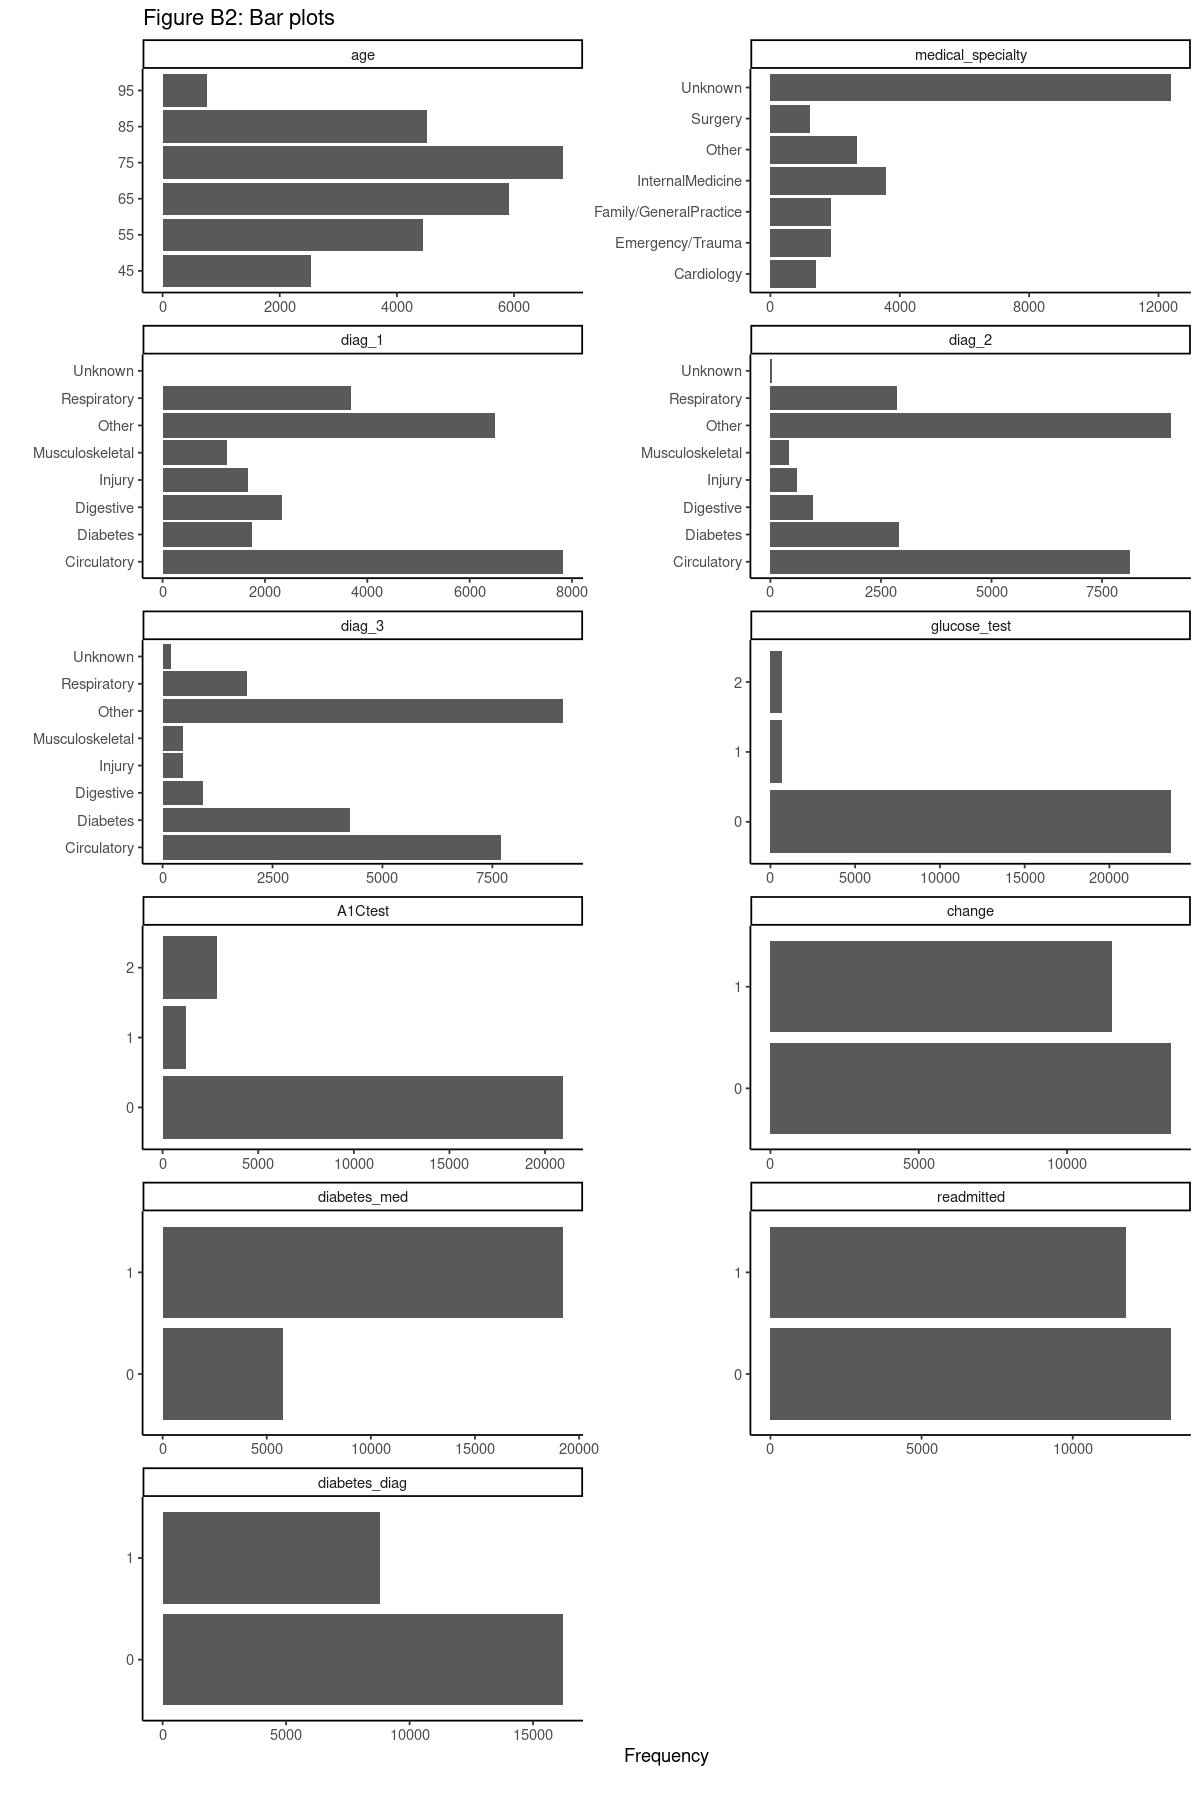

In [29]:
DataExplorer::plot_bar(plot_data, order_bar = FALSE,
         ncol = 2, nrow = 7, ggtheme = theme_classic(),
         title = "Figure B2: Bar plots",
         by_position = "stack")

The plots below show the distribution of the numeric variable values. It indicates that there is strong skew in all variables except for n_lab_procedures and n_medications.

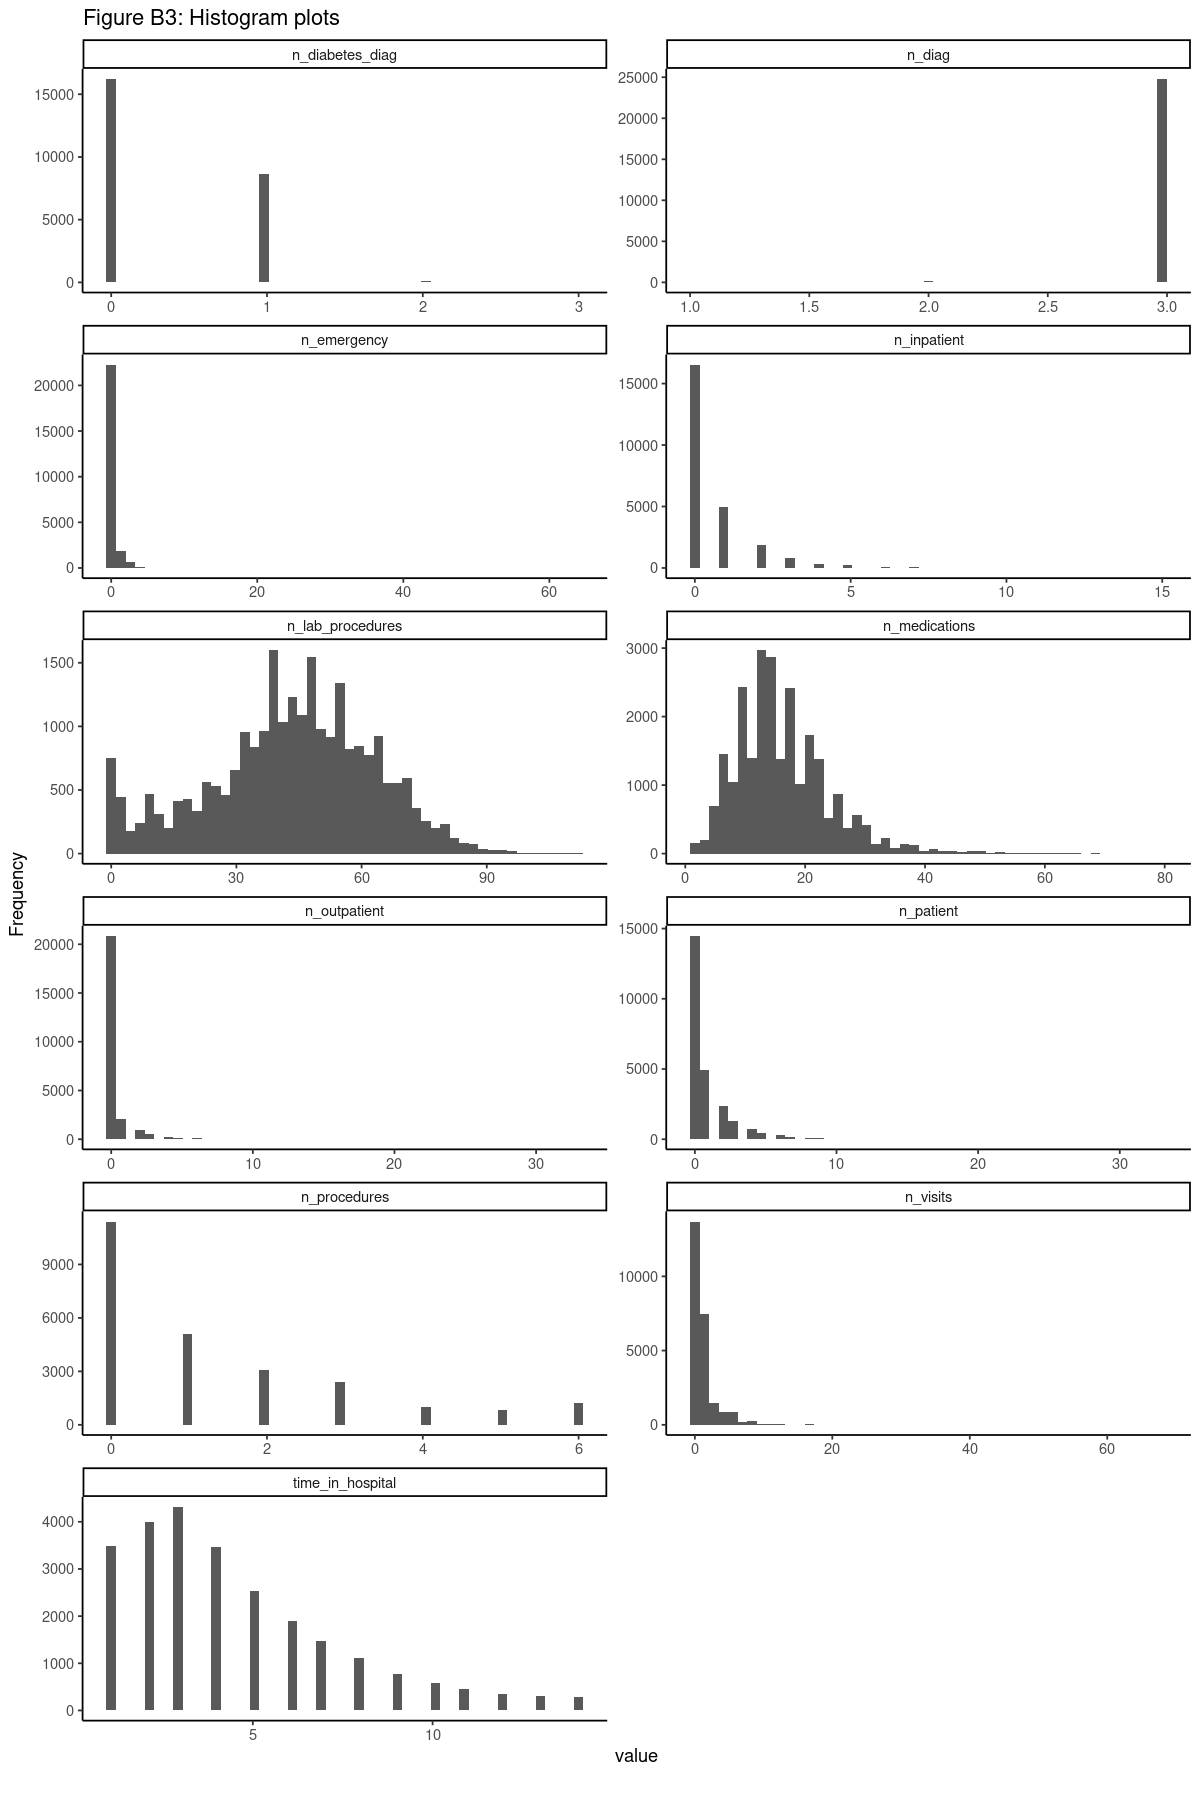

In [30]:
DataExplorer::plot_histogram(plot_data, ncol = 2, nrow = 7,
               geom_histogram_args = list(bins = 50),
               ggtheme = theme_classic(),
               title = "Figure B3: Histogram plots")

The plots below show the distribution of the numeric variable values by readmission status. They indicated very little difference between the two groups, except to confirm that those readmitted had a slightly higher numbers of hospital visits over the previous year.

In particular, the plots showed that:
- 75% of readmitted patients had 1 inpatient visit in the year prior to the hospital stay compared to 0 for non-readmitted patients
- 75% of readmitted patients had 2 patient or total visits in the year prior compared to just 1 for non-readmitted patients
- most patients underwent 58 lab procedures and 2 procedures
- most patients received 21 or fewer medications
- most patients spent up to 6 days in hospital.

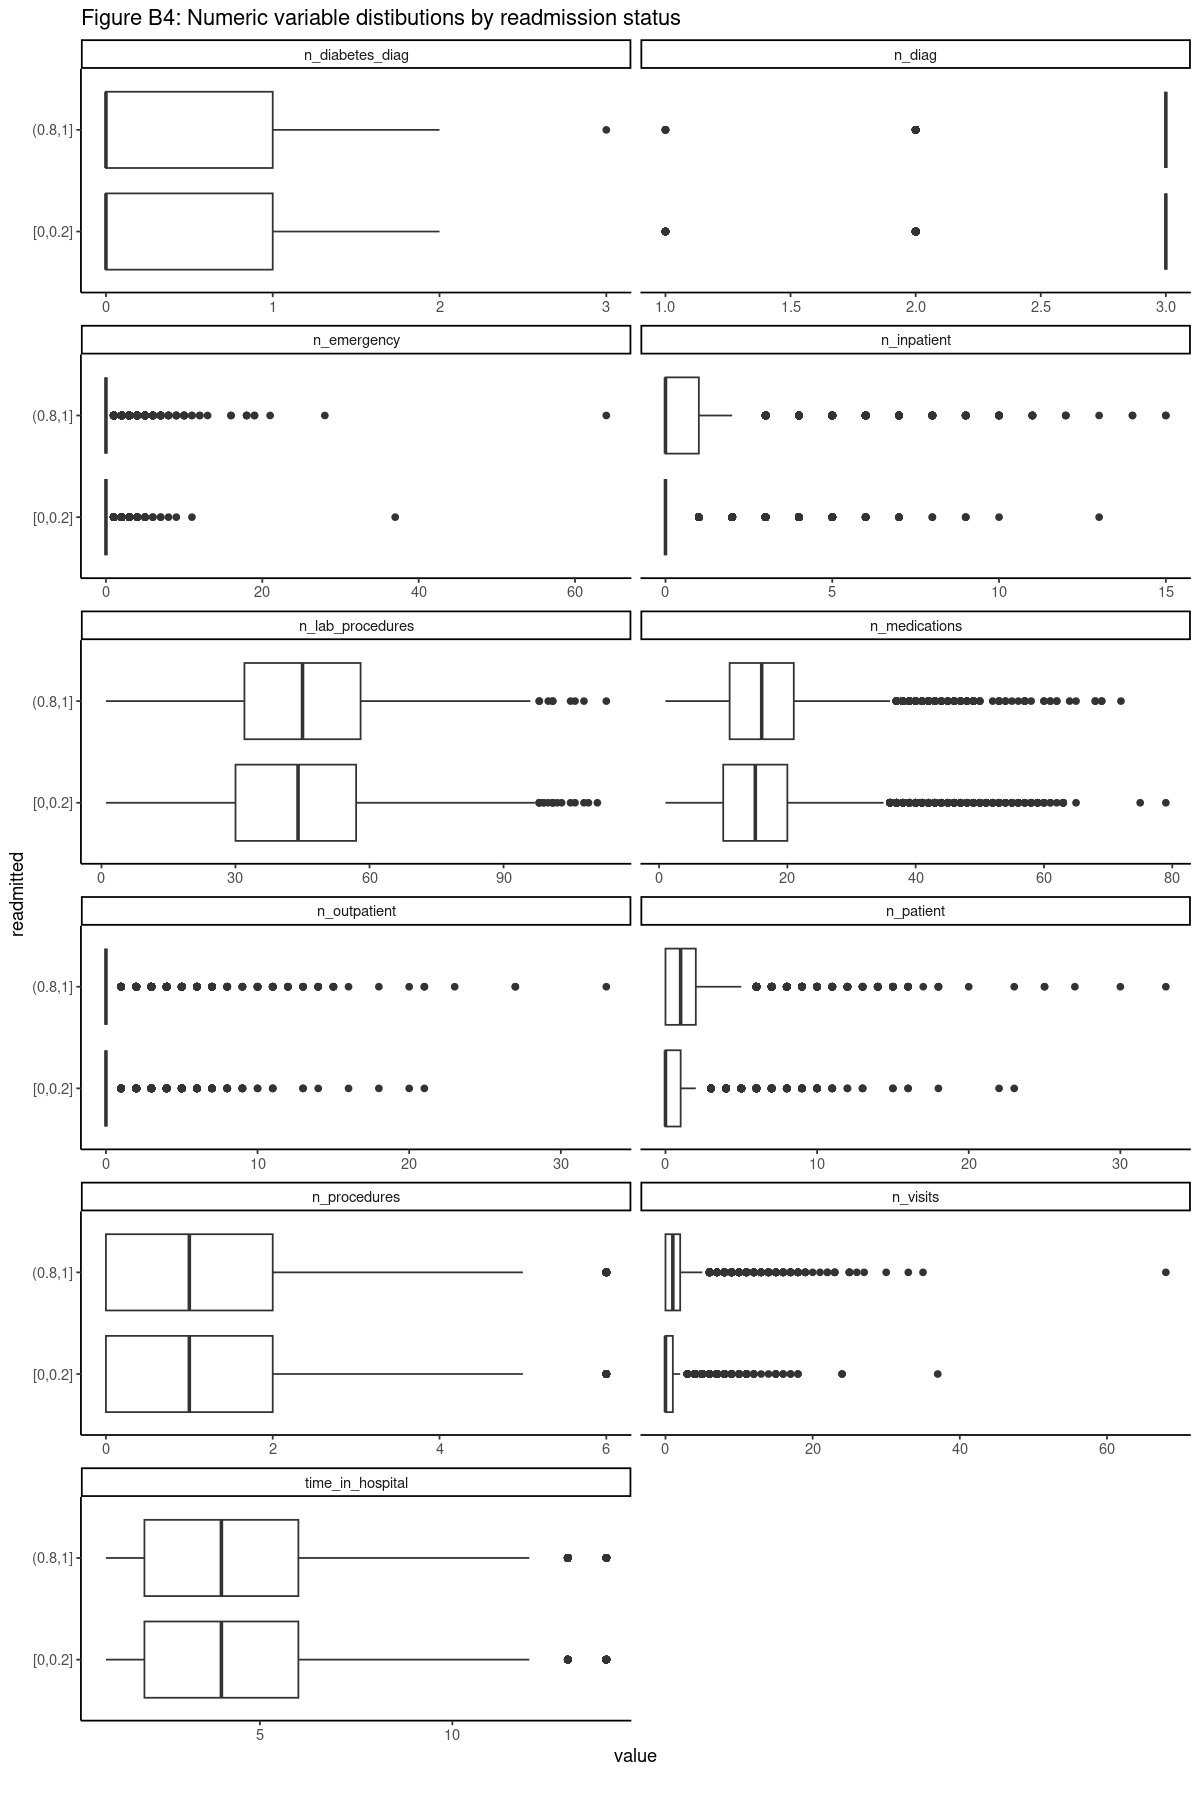

In [31]:
DataExplorer::plot_boxplot(plot_data, by = "readmitted",
                           ncol = 2, nrow = 7,
                           ggtheme = theme_classic(),
                           title = "Figure B4: Numeric variable distibutions by readmission status")

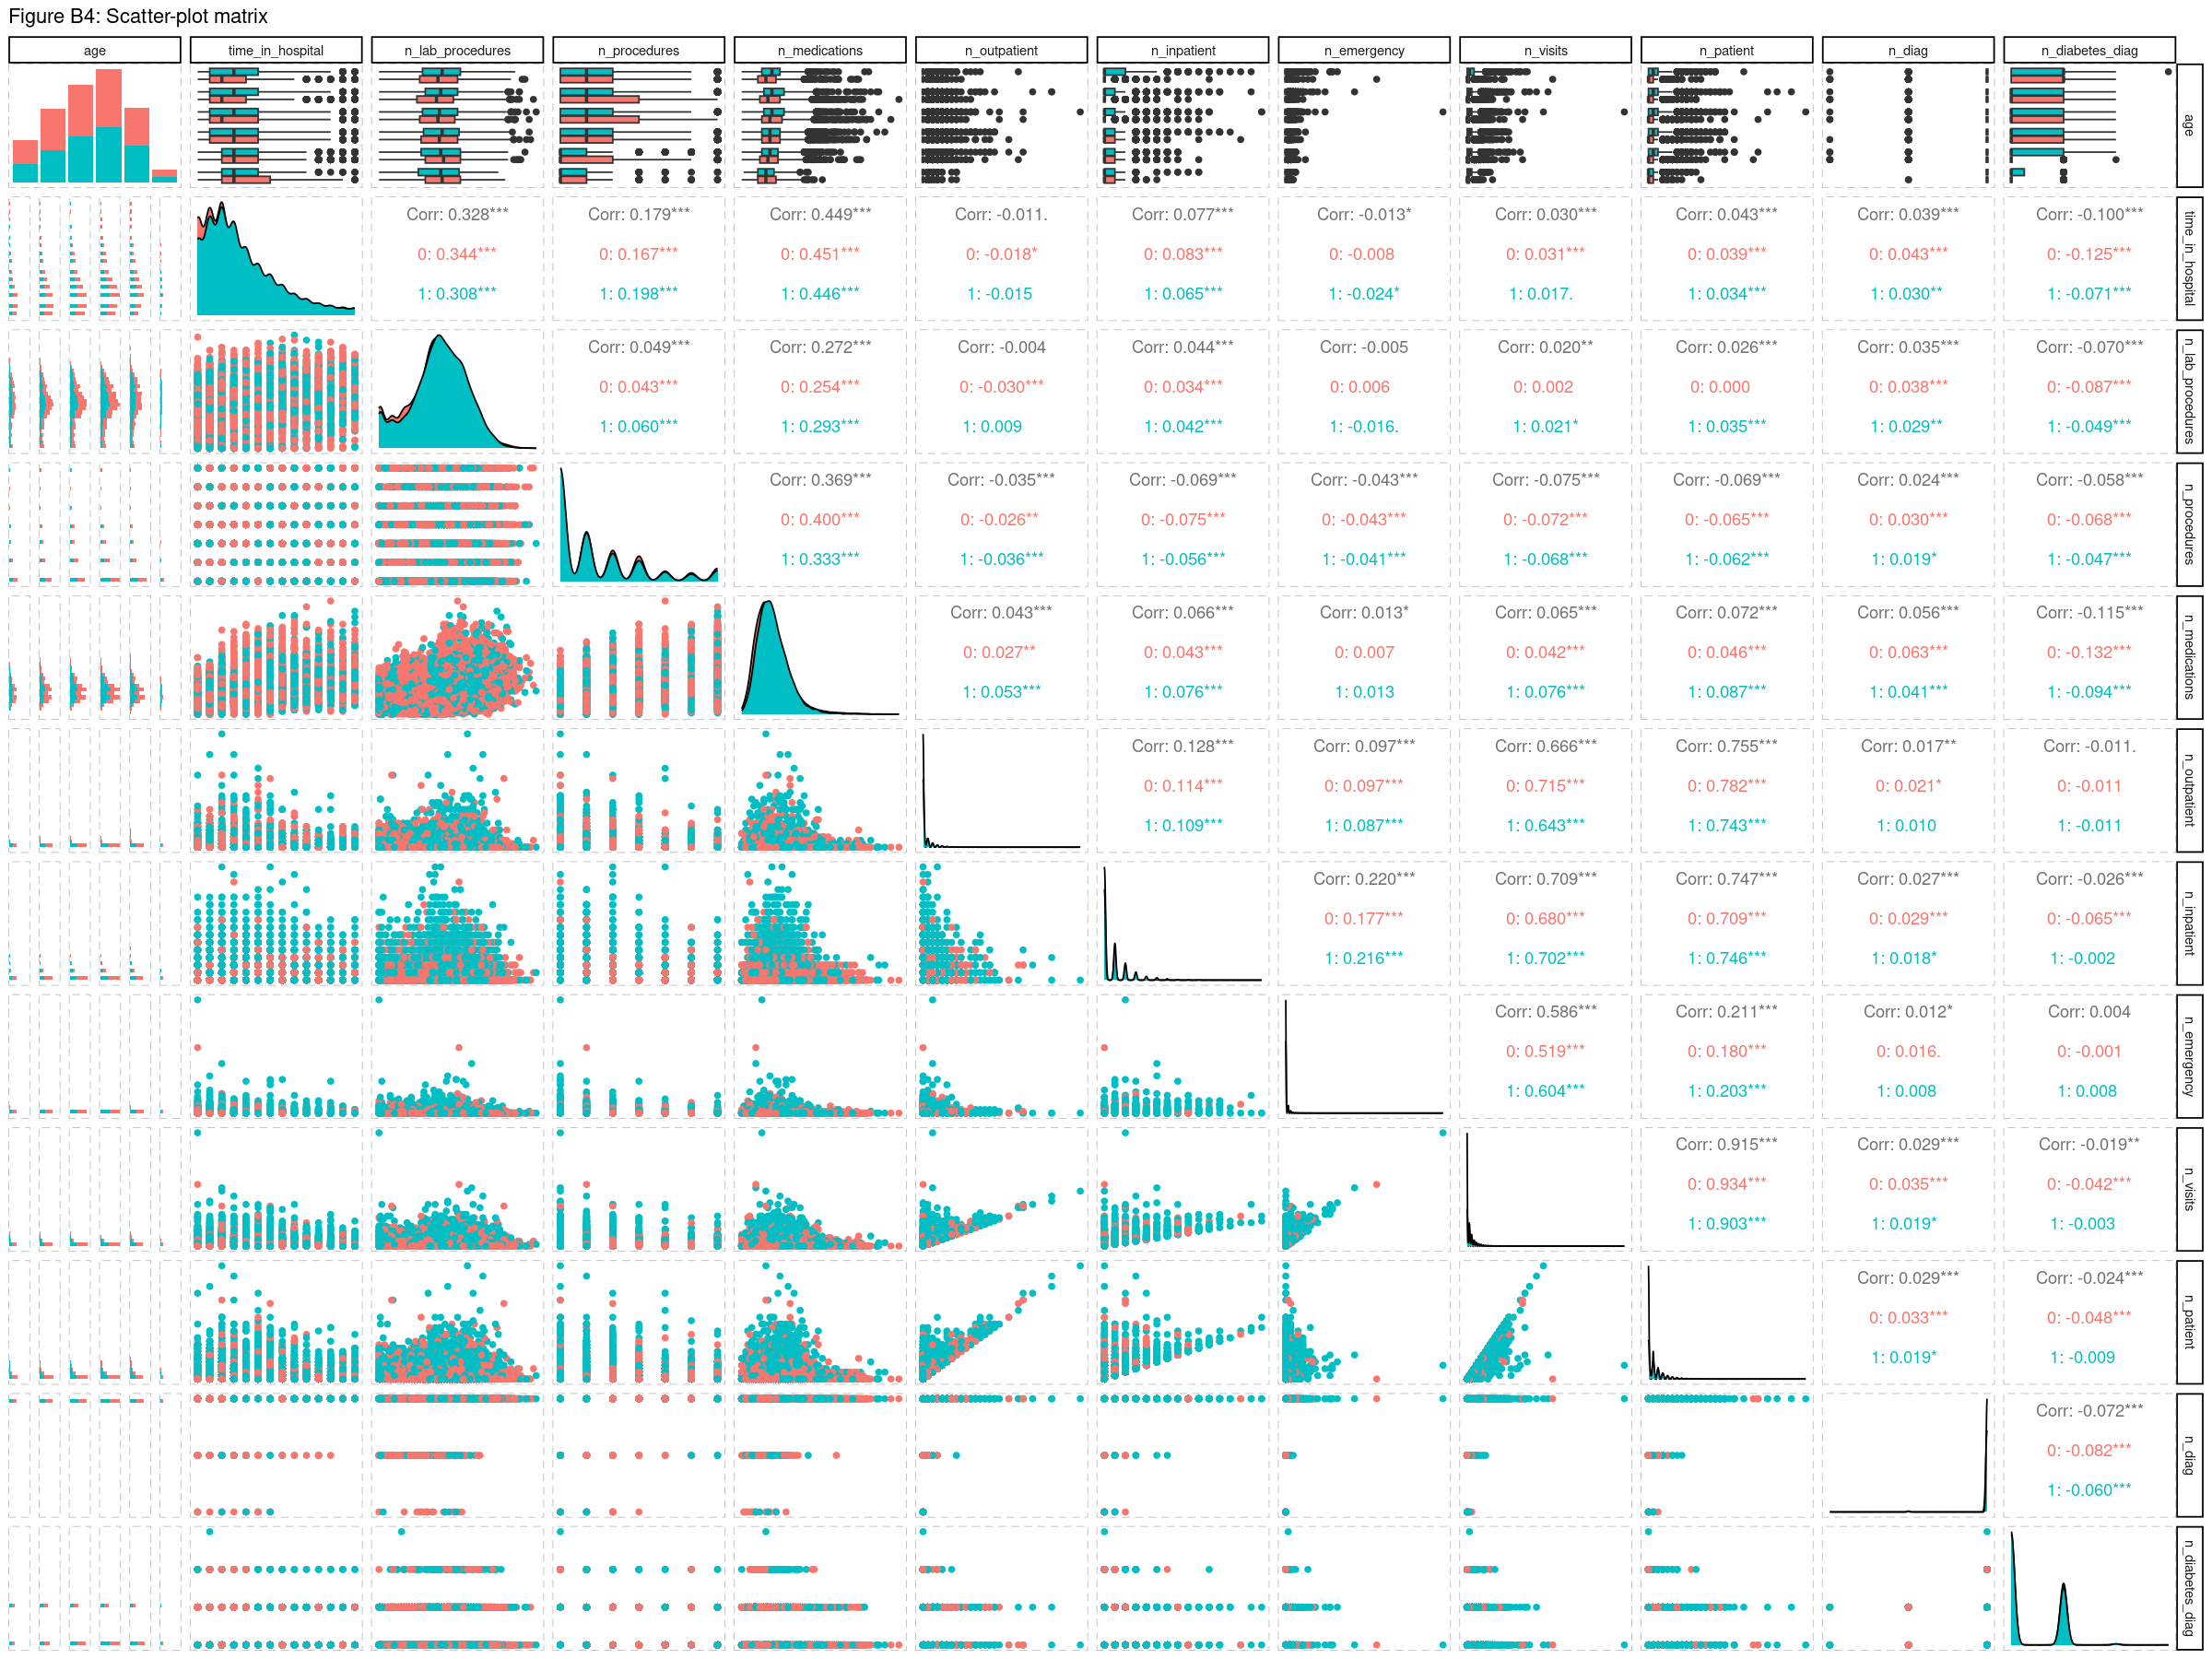

In [35]:
splom_data <- plot_data %>%
    # categorical variables
    select(-c(medical_specialty, starts_with("diag"))) %>%
    # binary variables
    select(-c(glucose_test, A1Ctest, change, diabetes_med, diabetes_diag))
feature_cols <- splom_data %>% select(-readmitted) %>% names()

options(repr.plot.width=20, repr.plot.height=15)
ggpairs(splom_data, aes(colour = factor(readmitted)), axisLabels = "none",
        columns = feature_cols,
        lower = list(combo = wrap(ggally_facethist, bins = 30))) +
    labs(title = "Figure B4: Scatter-plot matrix") +
    theme_classic() +
    theme(panel.border = element_rect(linetype = "dashed", colour = "gray", fill = NA))

## **Appendix C - Diagnosis by Age Group Analysis**

In [36]:
top_diag <- get_top_diagnosis(DIAG_TYPE = "diag_2")
colnames(top_diag) <- c("Age Group", "Diagnosis", "Count", "Proportion Within Group")
print("Table C1: Top secondary diagnosis by age group")
top_diag

top_diag <- get_top_diagnosis(DIAG_TYPE = "diag_3")
colnames(top_diag) <- c("Age Group", "Diagnosis", "Count", "Proportion Within Group")
print("Table C2: Top additional secondary diagnosis by age group")
top_diag

Selecting by prop


[1] "Table C1: Top secondary diagnosis by age group"


New names:
• `` -> `...1`


Age Group,Diagnosis,Count,Proportion Within Group
<chr>,<fct>,<int>,<dbl>
40-49 years,Other,1097,43.33
50-59 years,Other,1587,35.65
60-69 years,Other,2036,34.43
70-79 years,Circulatory,2483,36.32
80-89 years,Other,1691,37.44
90-99 years,Other,306,40.80


Selecting by prop


[1] "Table C2: Top additional secondary diagnosis by age group"


New names:
• `` -> `...1`


Age Group,Diagnosis,Count,Proportion Within Group
<chr>,<fct>,<int>,<dbl>
40-49 years,Other,1084,42.81
50-59 years,Other,1635,36.73
60-69 years,Other,2068,34.97
70-79 years,Other,2383,34.85
80-89 years,Other,1645,36.43
90-99 years,Other,292,38.93


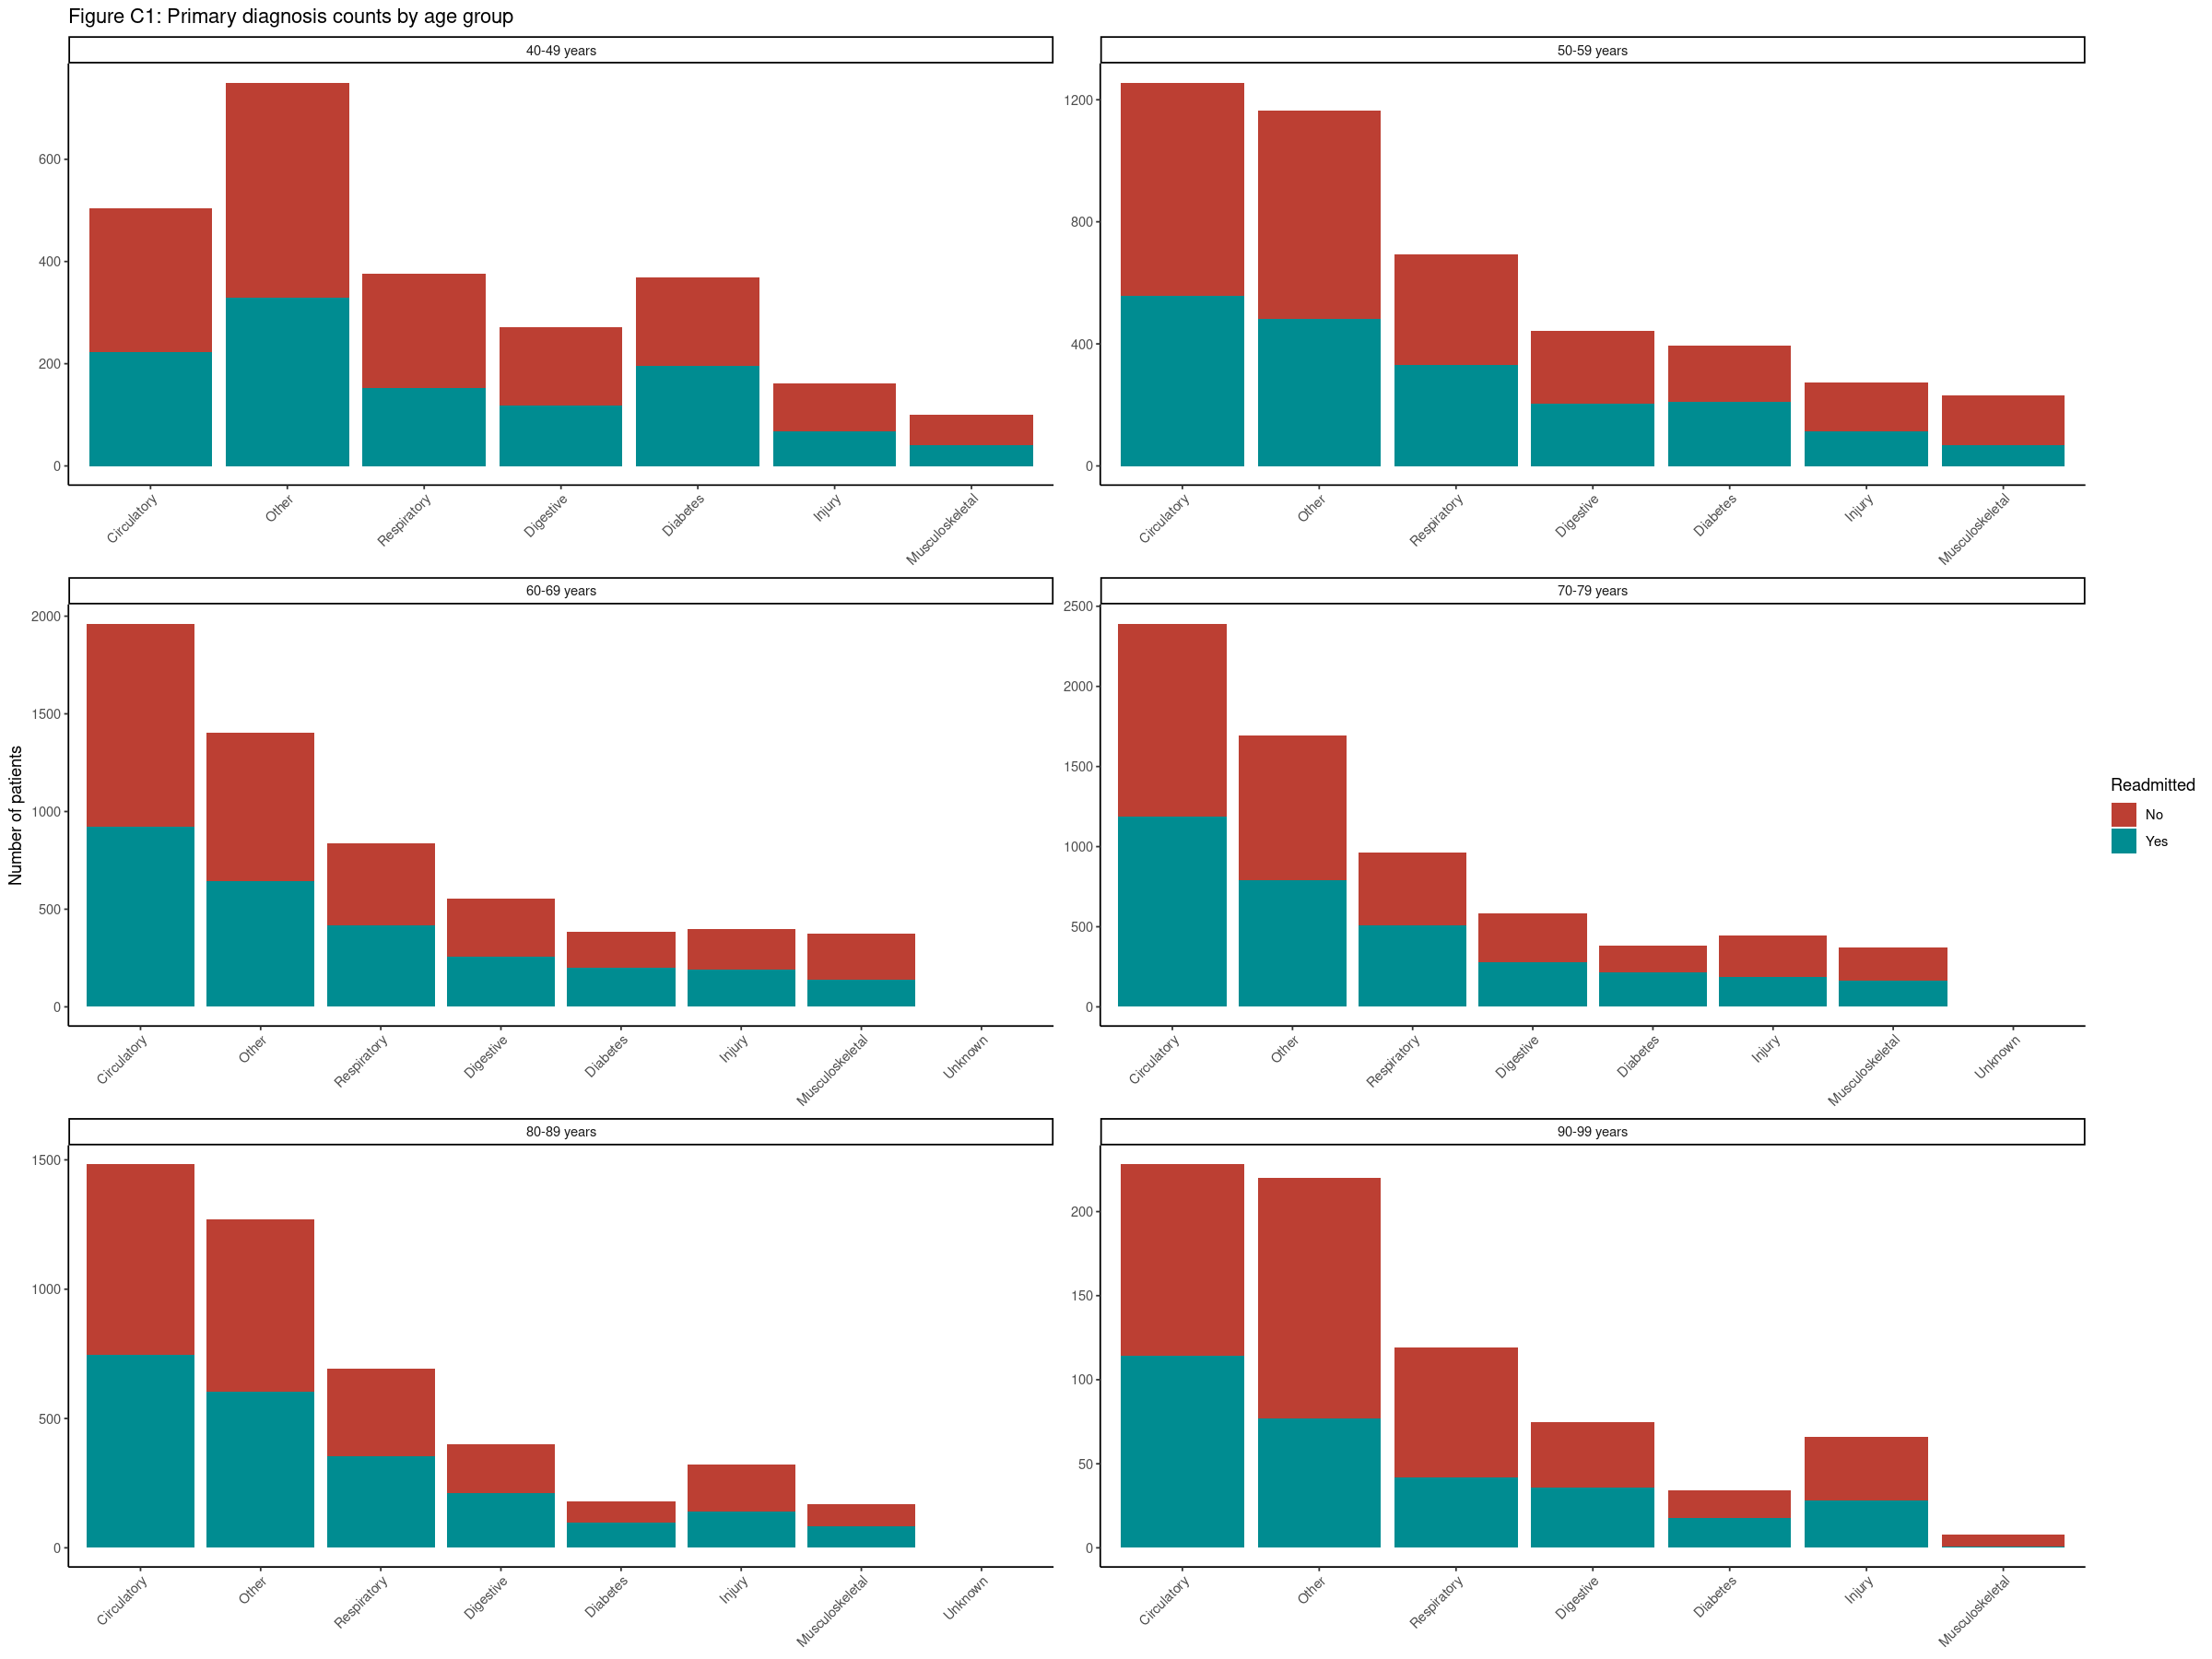

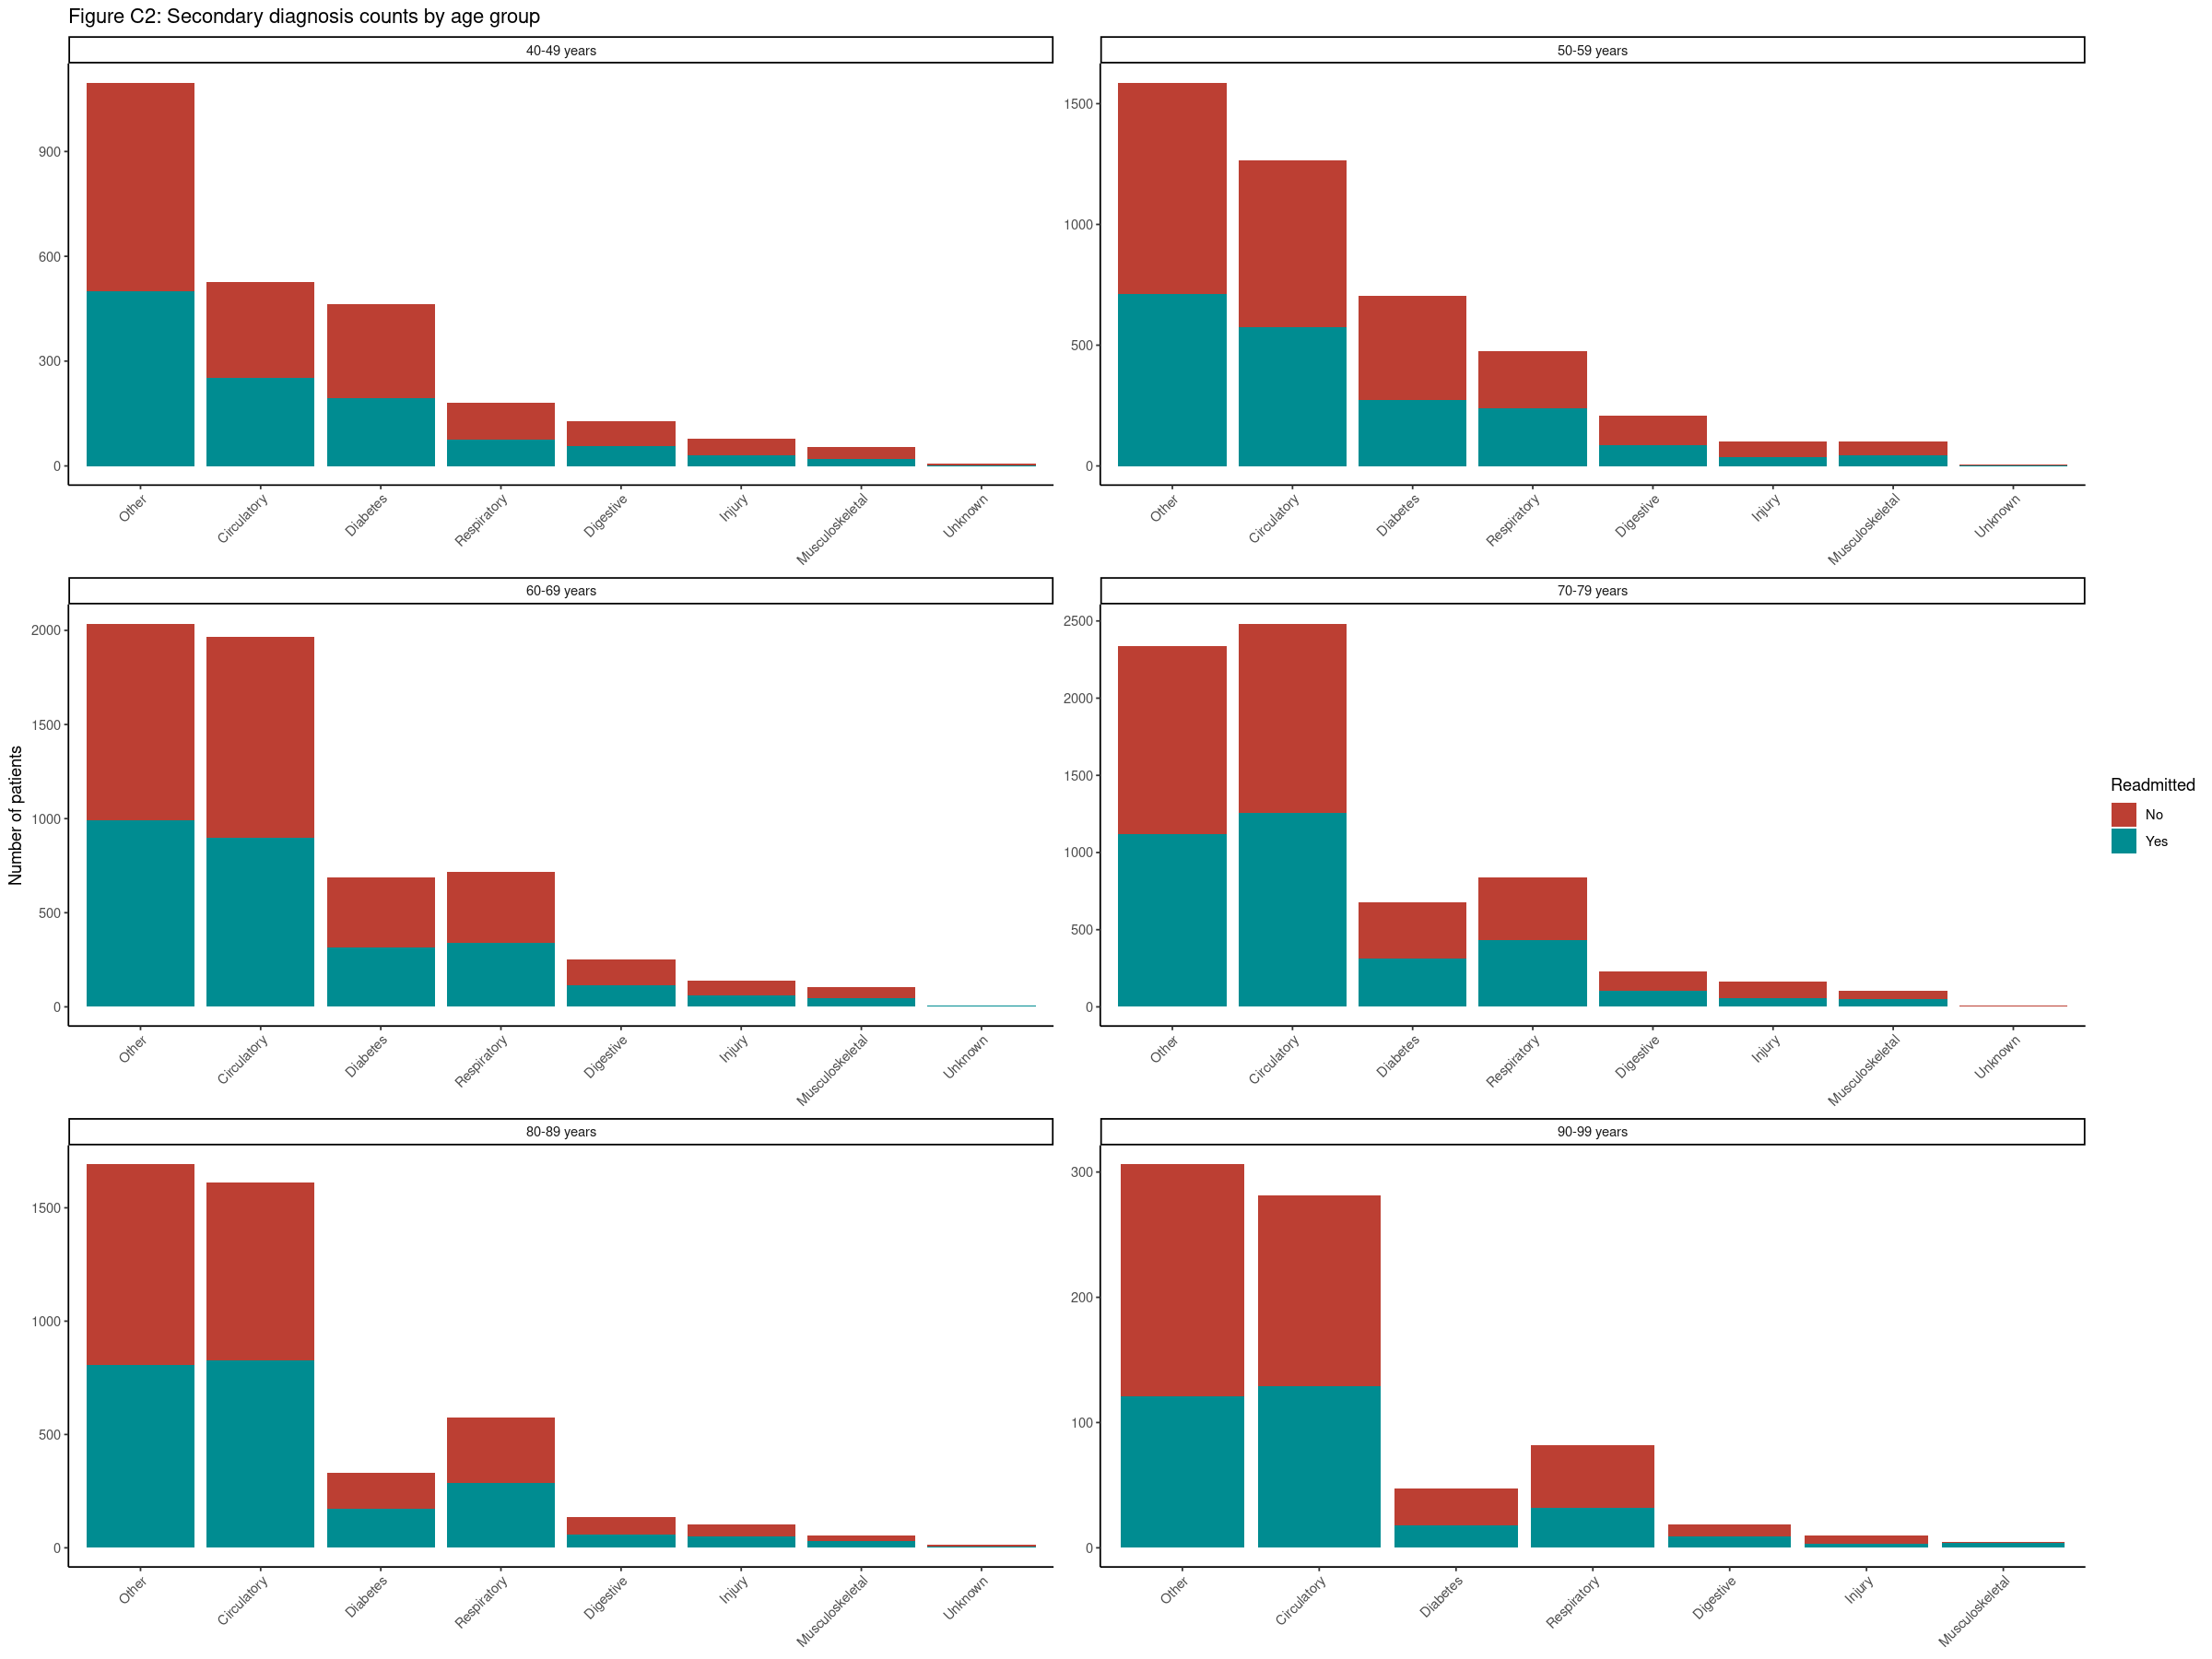

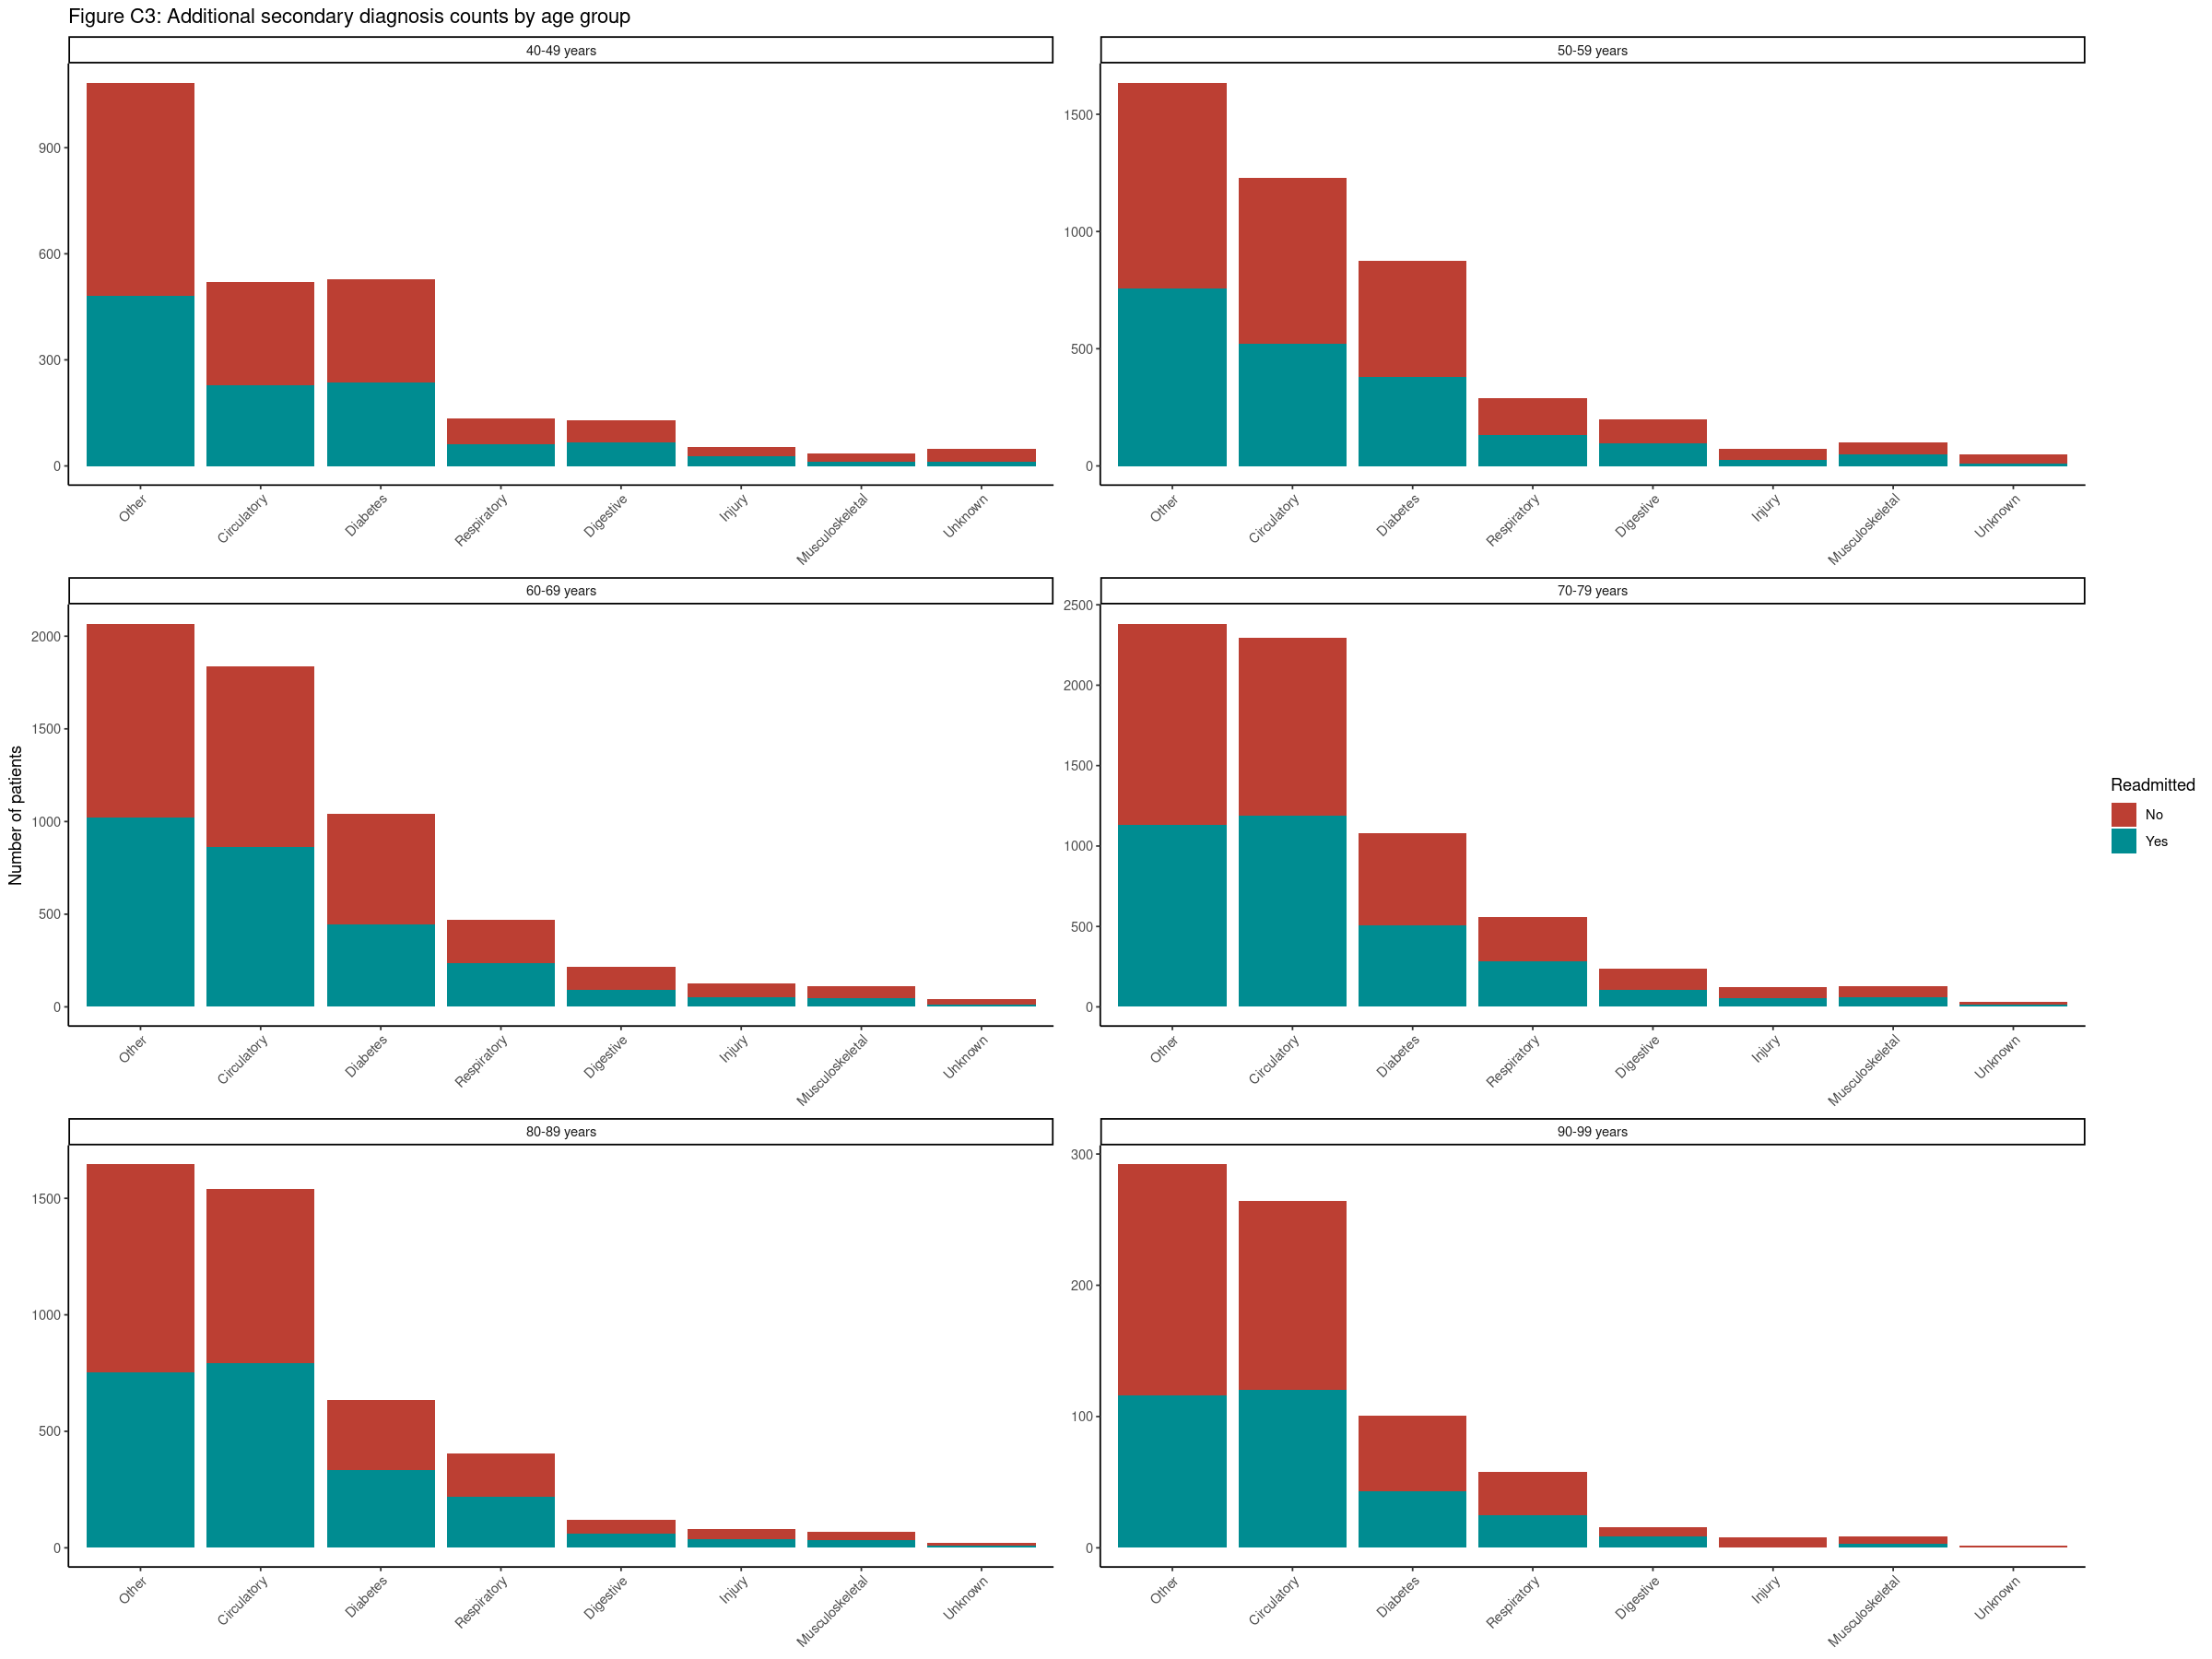

In [37]:
age_readmissions <- readmissions %>%
    select(readmitted, age, diag_1:diag_3) %>%
    pivot_longer(cols = starts_with("diag_"), names_to = "diag_type", values_to = "diag")

plot_diagnosis_counts <- function(DIAG_TYPE = "diag_1") {
    age_readmissions %>%
    filter(diag_type == DIAG_TYPE) %>%
    mutate(age = recode(age, "45" = "40-49 years", "55" = "50-59 years", "65" = "60-69 years", "75" = "70-79 years",
                        "85" = "80-89 years", "95" = "90-99 years"),
           readmitted = recode(readmitted, "0" = "No", "1" = "Yes")) %>%
    ggplot(aes(x = forcats::fct_infreq(diag), fill = factor(readmitted))) +
        geom_bar() +
        facet_wrap(~ age, nrow = 3, ncol = 2, scales = "free") +
        theme_classic() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        scale_fill_hue(l = 45) +
        guides(fill = guide_legend(title = "Readmitted")) +
        labs(x = NULL, y = "Number of patients")
}

plot_diagnosis_counts() + ggtitle("Figure C1: Primary diagnosis counts by age group")
plot_diagnosis_counts(DIAG_TYPE = "diag_2") + ggtitle("Figure C2: Secondary diagnosis counts by age group")
plot_diagnosis_counts(DIAG_TYPE = "diag_3") + ggtitle("Figure C3: Additional secondary diagnosis counts by age group")

## **Appendix D - Individual Hypothesis Tests of the Predictors**

As shown in Figure C.1, the significance test indicated that medical specialty and readmission rates were significantly associated $(\chi^2 = 85.51, p = 0.00)$. Post-hoc comparisons of readmission rates for each of the individual specialty categories using a Tukey-Kramer test indicated that at a 5% significance level, readmission rates were significantly different for 9 of the 21 possible comparisons. These were:
- Internal Medicine compared to Emergency Trauma, Family/General Practice and Unknown (all higher)
- Other compared to Emergency Trauma, Family/General Practice and Unknown (all higher)
- Surgery compared to Emergency Trauma, Family/General Pratice and Unknown (all higher)

Figure C.2 shows the confidence intervals for the mean difference in readmission rates along with their 95% confidence intervals for all combinations. Those with a range including 0 are statistically insignificant.

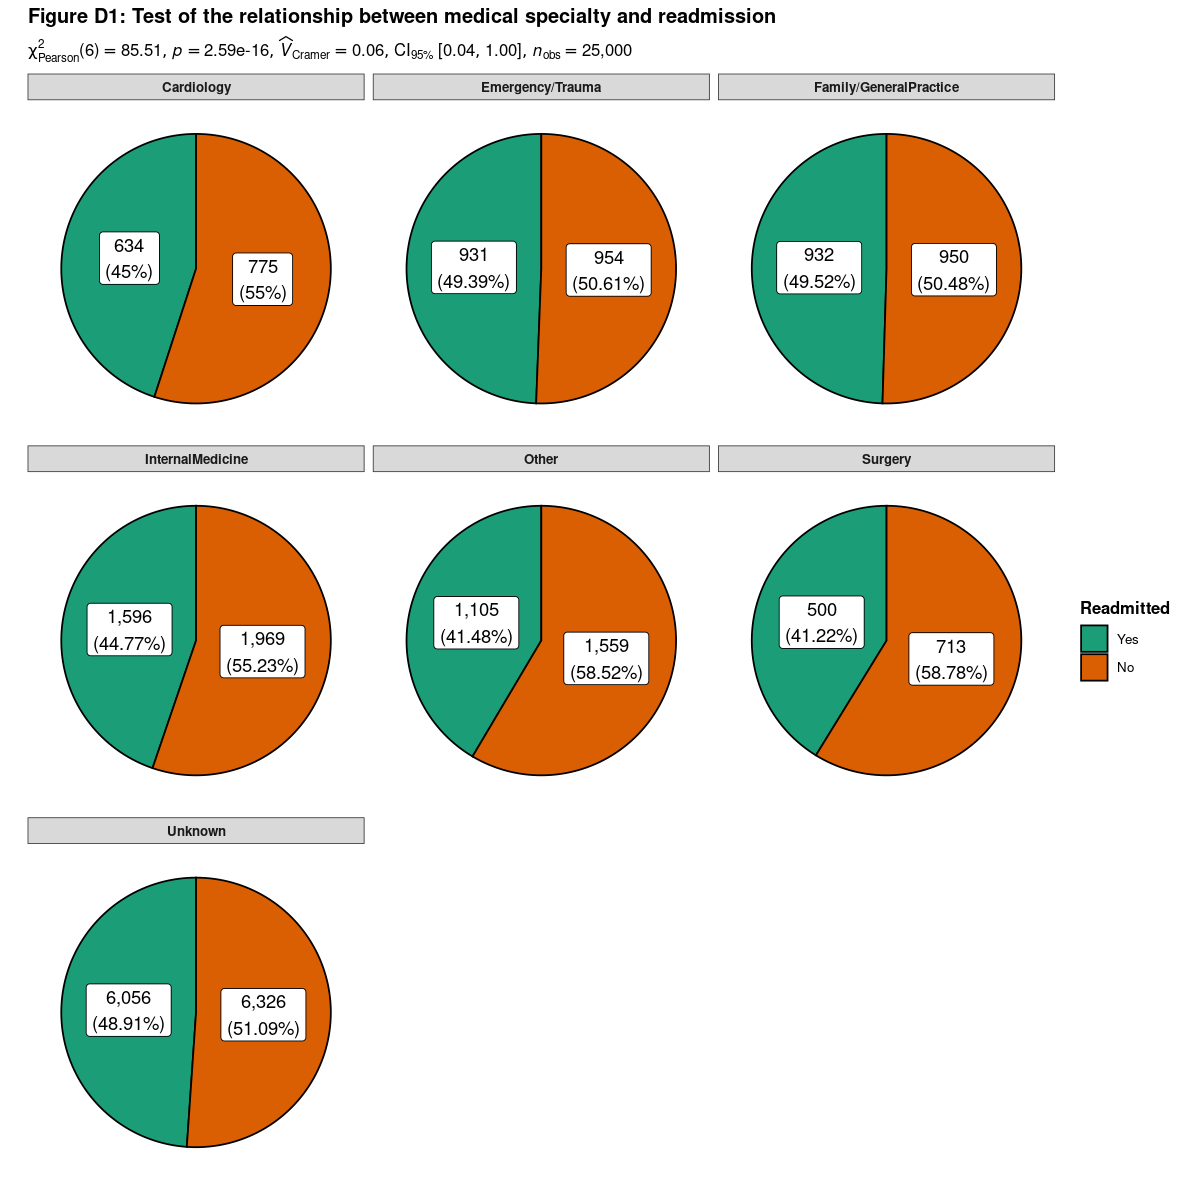

In [38]:
binary_to_string <- function(x) {
    ifelse(x == 1, "Yes", "No")
}

options(repr.plot.width=10, repr.plot.height=10)
readmission_rates <- readmissions %>%
    mutate(readmitted = binary_to_string(readmitted),
           glucose_test = recode(glucose_test, "0" = "Not performed", "1" = "Normal", "2" = "High"),
           A1Ctest = recode(A1Ctest, "0" = "Not performed", "1" = "Normal", "2" = "High"),
           change = binary_to_string(change),
           diabetes_med = binary_to_string(diabetes_med),
           diabetes_diag = binary_to_string(diabetes_diag),           
           medical_specialty = as.character(medical_specialty))
ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = medical_specialty,
           title = "Figure D1: Test of the relationship between medical specialty and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)

In [39]:
aov_model <- aov(readmitted ~ medical_specialty, data = readmissions)
tukey_test <- TukeyHSD(aov_model, conf.level = 0.95)
# plot(TukeyHSD(model, conf.level = 0.95), las=1, col = "purple")

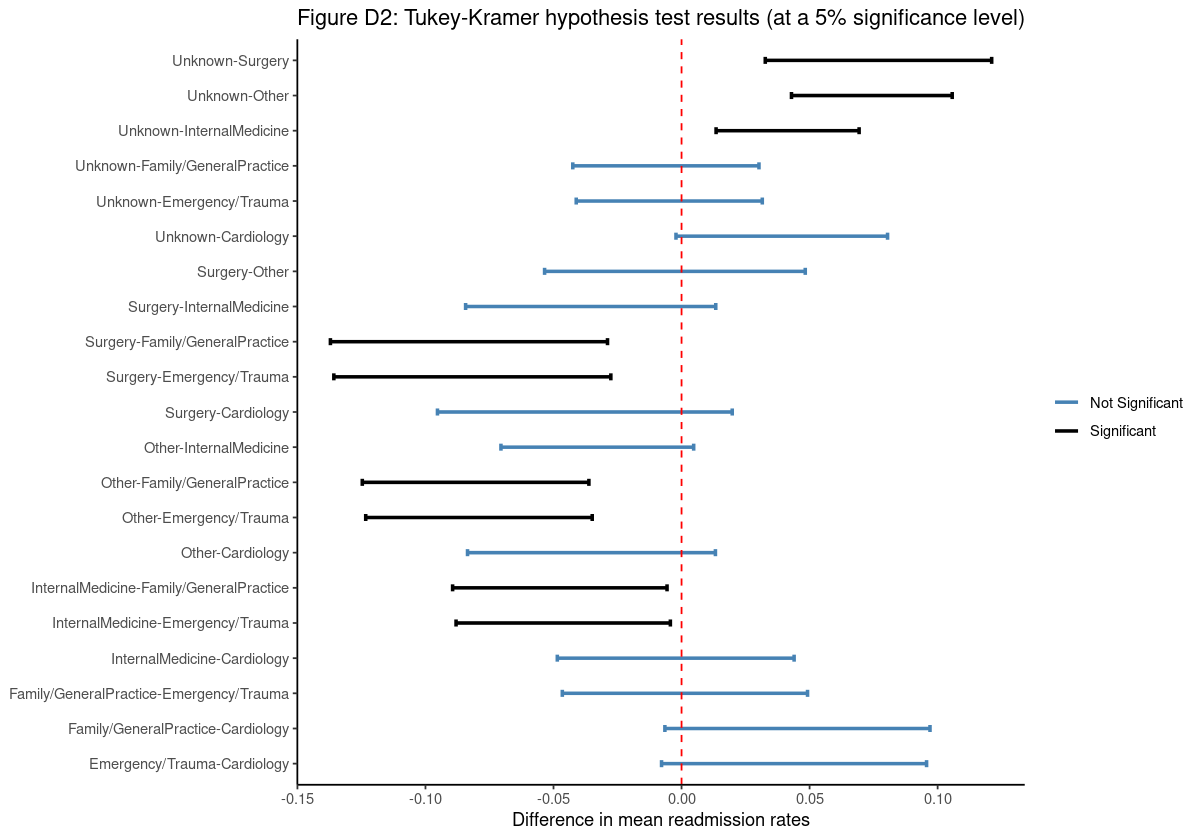

In [40]:
options(repr.plot.width=10, repr.plot.height=7)
ggtukey<-function(Tukey){
  B <- as.data.frame(Tukey[1])
  colnames(B)[2:4] <- c("min", "max", "p")
  C <- data.frame(id = row.names(B),
                  min = B$min, max = B$max,
                  idt = ifelse(B$p < 0.05, "Significant", "Not Significant"))
  D <- C %>%
    ggplot(aes(id, colour = idt)) +
    geom_errorbar(aes(ymin = min, ymax = max), width = 0.2, linewidth = 1.0) +
    geom_hline(yintercept = 0, color = "red", linetype = 'dashed') +
    labs(x = NULL, y = "Difference in mean readmission rates", colour = NULL,
         title = "Figure D2: Tukey-Kramer hypothesis test results (at a 5% significance level)") +
    scale_color_manual(values = c("steelblue", "black")) +
    coord_flip() +
    theme_classic()
  return(D)
}

ggtukey(tukey_test)

Figures C.3 to C.6 compare the readmission rates for each of the remaining categorical variables. They indicated that:
- the readmission rate for patients who had a change in diabetes medication was higher than for patients who had not $(\chi^2 = 46.69, p = 0.00)$
- the readmission rate for patients who had been prescribed a diabetes medication was higher than for patients who had not been $(\chi^2 = 96.55, p = 0.00)$
- readmission rates and the result of a glucose test were significantly associated $(\chi^2 = 7.75, p = 0.02)$
- readmission rates and the result of an A1C test were significantly associated $(\chi^2 = 14.83, p = 0.00)$

Post-hoc comparisons of the readmission rates for glucose_test and A1Ctest using a Tukey-Kramer test indicated that at a 5% significance level, readmission rates were:
- significantly higher for patients with a high glucose test result compared to patients for which a test had not been performed $(p = 0.02)$ but otherwise statistically similar
- significantly higher for patients for which an A1C test had not been performed compared to a normal result $(p = 0.00)$ but otherwise statistically similar

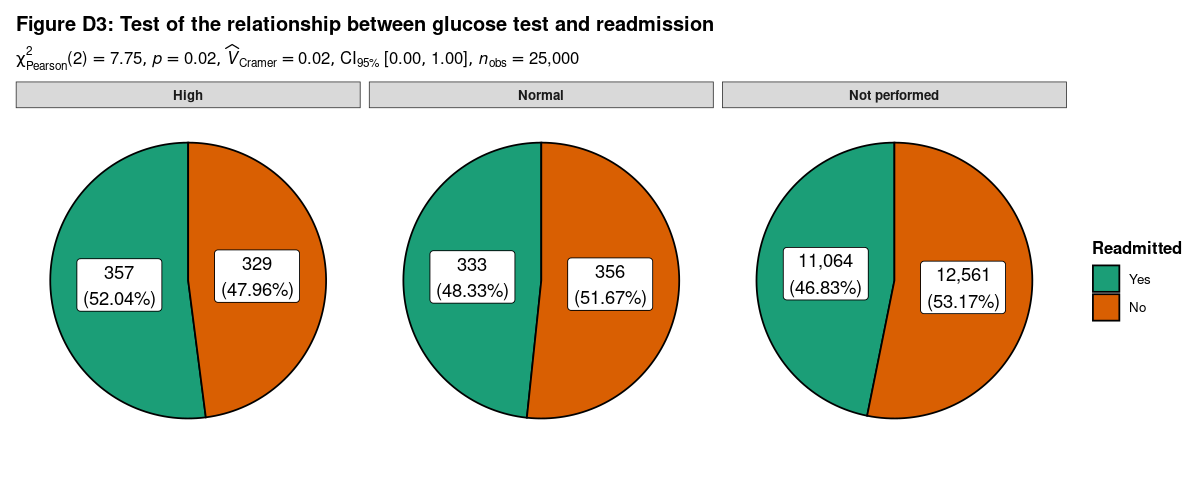

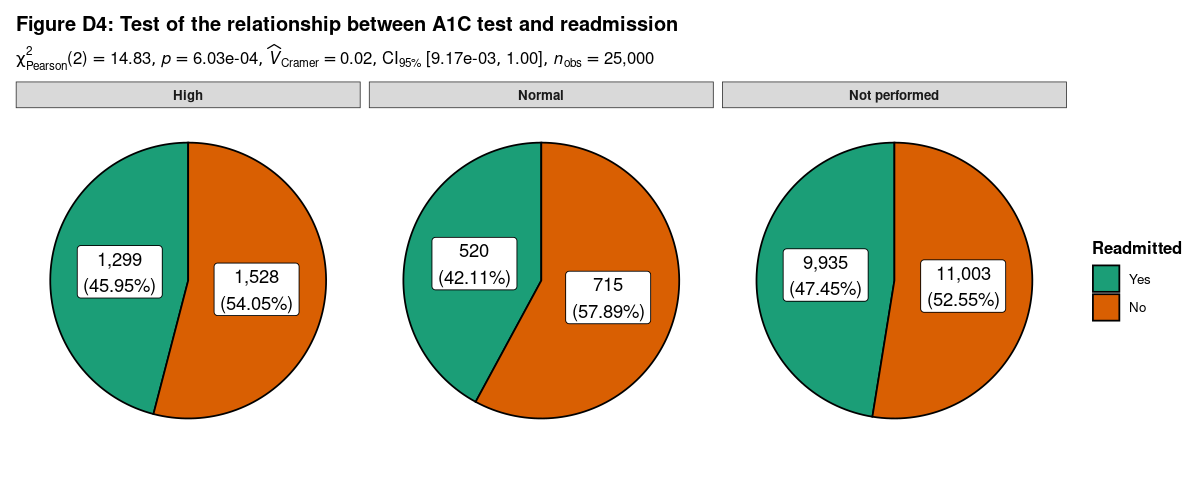

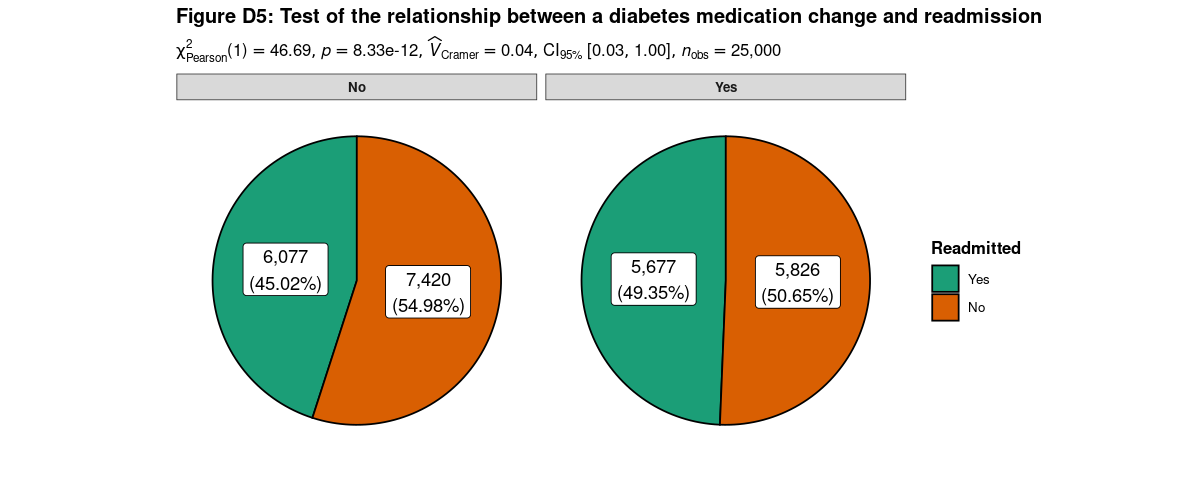

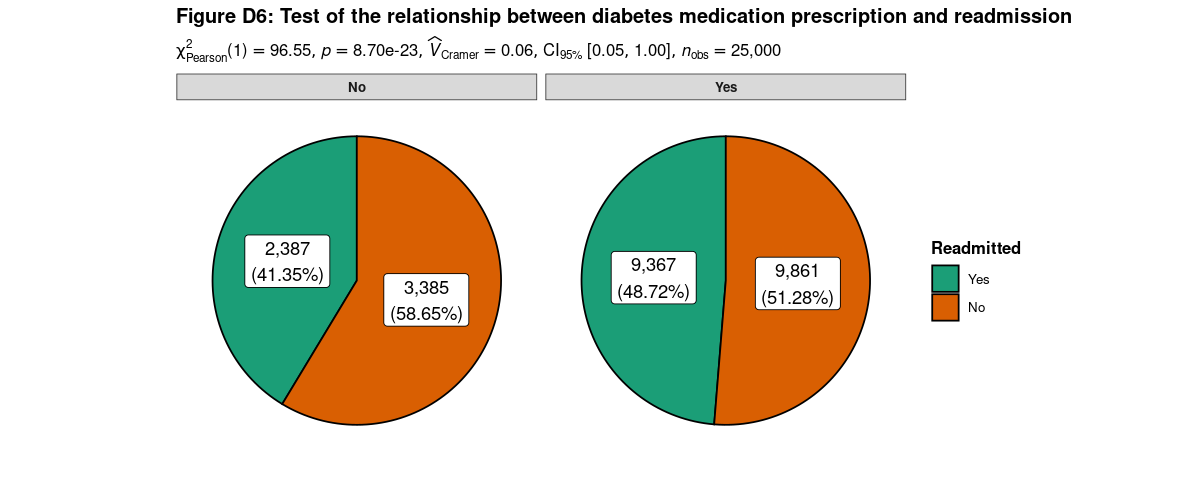

In [41]:
options(repr.plot.width=10, repr.plot.height=4)
ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = glucose_test,
           title = "Figure D3: Test of the relationship between glucose test and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = A1Ctest,
           title = "Figure D4: Test of the relationship between A1C test and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = change,
           title = "Figure D5: Test of the relationship between a diabetes medication change and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diabetes_med,
           title = "Figure D6: Test of the relationship between diabetes medication prescription and readmission",
           legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
           perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)

In [42]:
readmission_rates <- readmission_rates %>%
    mutate(across(where(is.character), as.factor)) %>%
    mutate(readmitted = recode(readmitted, "Yes" = 0, "No" = 1))

aov_model <- aov(readmitted ~ glucose_test, data = readmission_rates)
tukey_test <- TukeyHSD(aov_model, conf.level = 0.95)
# tukey_test

aov_model <- aov(readmitted ~ A1Ctest, data = readmission_rates)
tukey_test <- TukeyHSD(aov_model, conf.level = 0.95)
# tukey_test

In [43]:
lr_model <- glm(readmitted ~ age, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ time_in_hospital, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_lab_procedures, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_medications, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_outpatient, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_inpatient, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_emergency, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_visits, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_patient, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_diag, family = "binomial", data = readmissions)
# summary(lr_model)
lr_model <- glm(readmitted ~ n_diabetes_diag, family = "binomial", data = readmissions)
# summary(lr_model)

## **Appendix E - Report Code**

In [ ]:
# library(tidyverse)
# library(tidymodels)
# library(correlationfunnel)
# library(finetune)
# library(vip)
# library(fastshap)
# library(DALEX)

# requireNamespace("skimr")
# requireNamespace("DataExplorer")
# requireNamespace("GGally")
# requireNamespace("keras")
# requireNamespace("ggstatsplot")

readmissions <- readr::read_csv('data/hospital_readmissions.csv', show_col_types = FALSE)
# glimpse(readmissions)

string_to_binary <- function(x) {
    ifelse(x == "yes", 1, 0)
}

string_to_numeric <- function(x) {
    ifelse(x == "no", 0, ifelse(x == "normal", 1, 2))
}

replace_value <- function(x) {
    ifelse(x == "Missing", "Unknown", x)
}

convert_to_midpoint <- function(x) {
    case_when(x == "[40-50)" ~ 45,
              x == "[50-60)" ~ 55,
              x == "[60-70)" ~ 65,
              x == "[70-80)" ~ 75,
              x == "[80-90)" ~ 85,
              x == "[90-100)" ~ 95)
}

diag_count <- function(x) {
    ifelse(x == "Unknown", 0, 1)
}

diabetes_count <- function(x) {
    ifelse(x == "Diabetes", 1, 0)
}

readmissions <- readmissions %>%
    mutate(across(change:readmitted, string_to_binary),
           across(glucose_test:A1Ctest, string_to_numeric),
           across(medical_specialty:diag_3, replace_value),
           across(medical_specialty:diag_3, as.factor),
           age = convert_to_midpoint(age),
           n_visits = n_outpatient + n_inpatient + n_emergency,
           n_patient = n_outpatient + n_inpatient,
           n_diag = diag_count(diag_1) + diag_count(diag_2) + diag_count(diag_3),
           n_diabetes_diag = diabetes_count(diag_1) + diabetes_count(diag_2) + diabetes_count(diag_3),
           diabetes_diag = ifelse(diag_1 == "Diabetes" | diag_2 == "Diabetes" | diag_3 == "Diabetes", 1, 0))

options(dplyr.summarise.inform = FALSE)

age_readmissions <- readmissions %>%
    select(readmitted, age, starts_with("diag_")) %>%
    mutate(age = recode(age,
                        "45" = "40-49 years", "55" = "50-59 years", "65" = "60-69 years",
                        "75" = "70-79 years", "85" = "80-89 years", "95" = "90-99 years"),
           readmitted = recode(readmitted, "0" = "No", "1" = "Yes")) %>%
    pivot_longer(cols = starts_with("diag_"), names_to = "diag_type", values_to = "diagnosis") %>%
    group_by(age, diag_type, diagnosis) %>%
    summarise(n = n()) %>%
    group_by(age, diag_type) %>%
    mutate(prop = round(n / sum(n) * 100, 2))

get_top_diagnosis <- function(DIAG_TYPE = "diag_1") {
    top_diag <- age_readmissions %>%
        ungroup() %>%
        filter(diag_type == DIAG_TYPE) %>%
        select(-diag_type) %>%
        group_by(age) %>%
        top_n(1)
}

top_diag <- get_top_diagnosis()

diabetes_or_else <- function(x, incl_unknown = TRUE) {
    if (incl_unknown == FALSE) {
        ifelse(x == "Diabetes", "Diabetes", "Other")
    } else {
        ifelse(x == "Diabetes", "Diabetes", ifelse(x == "Unknown", "Unknown", "Other"))
    }
}

readmission_rates <- readmissions %>%
    select(readmitted, starts_with("diag")) %>%
    mutate(readmitted = recode(readmitted, "0" = "Yes", "1" = "No"),
           diag = ifelse(diag_1 == "Diabetes" | diag_2 == "Diabetes" | diag_3 == "Diabetes", "Diabetes",
                         ifelse(diag_1 == "Unknown" | diag_2 == "Unknown" | diag_3 == "Unknown", "Unknown", "Other")),
           diag_12 = diabetes_or_else(diag_1),
           diag_22 = diabetes_or_else(diag_2),
           diag_32 = diabetes_or_else(diag_3))

# want to test whether the readmission rate for two groups are significantly different from each other
# Group 1: Diabetes diagnosis
# Group 2: Non-diabetes diagnosis
recode_diag = function(x) {
    recode(x, "Diabetes" = 1, "Other" = 0, "Unknown" = 0)
}

readmission_test <- readmission_rates %>%
    mutate(readmitted = recode(readmitted, "Yes" = 1, "No" = 0),
           diag = recode_diag(diag),
           diag_12 = recode_diag(diag_12),
           diag_22 = recode_diag(diag_22),
           diag_32 = recode_diag(diag_32))

# options(repr.plot.width=10, repr.plot.height=4)
# ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag,
#            title = "Figure 1a: Test of the relationship between diagnosis and readmission",
#            legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
#            perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag != "Unknown")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag), correct = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag != "Other")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag), correct = FALSE)

# ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag_12,
#            title = "Figure 1b: Test of the relationship between primary diagnosis and readmission",
#            legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
#            perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag_12 != "Unknown")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_12), correct = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag_12 != "Other")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_12), correct = TRUE)

# ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag_22,
#            title = "Figure 1c: Test of the relationship between secondary diagnosis and readmission",
#            legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
#            perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag_22 != "Unknown")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_22), correct = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag_22 != "Other")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_22), correct = FALSE)

# ggstatsplot::ggpiestats(data = readmission_rates, x = readmitted, y = diag_32,
#            title = "Figure 1d: Test of the relationship between additional secondary diagnosis and readmission",
#            legend.title = "Readmitted", results.subtitle = TRUE, label = "both",
#            perc.k = 2L, bf.message = FALSE, proportion.test = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag_32 != "Unknown")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_32), correct = FALSE)
# readmission_rates2 <- readmission_rates %>% filter(diag_32 != "Other")
# prop.test(table(readmission_rates2$readmitted, readmission_rates2$diag_32), correct = FALSE)

# options(repr.plot.width=10, repr.plot.height=10)
# DataExplorer::plot_correlation(readmissions, type = "continuous", title = "Figure 2: Linear correlation plot of the numeric variables")

# options(repr.plot.width=10, repr.plot.height=8)
# readmissions %>%
#     binarize() %>%
#     # glimpse()
#     correlate(target = readmitted__1) %>%
#     plot_correlation_funnel(alpha = 0.75) +
#     labs(x = "Correlation", y = NULL, title = "Figure 3: Variable Correlation Funnel") +
#     theme_classic() +
#     theme(panel.grid.major.x = element_line(color = "grey", linewidth = 0.2, linetype = "dashed"))

set.seed(23)
train_test_split <- initial_split(readmissions, prop = 0.8)

all_train_data <- training(train_test_split)
test_data <- testing(train_test_split)

readmission_folds <- vfold_cv(all_train_data, v = 5, repeats = 2)

# parallel::detectCores()
# doMC::registerDoMC(cores = 15)

## Logistic Regresion
# define the recipes
baseline_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_lincomb(all_numeric_predictors()) %>%
    step_rm(all_of(c("medical_specialty_Unknown", "diag_3_Unknown")))

transform_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_lincomb(all_numeric_predictors()) %>%
    step_rm(all_of(c("n_patient", "medical_specialty_Unknown", "diag_3_Unknown")))

normalise_recipe <- recipe(readmitted ~., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_normalize(all_numeric_predictors()) %>%
    step_lincomb(all_numeric_predictors()) %>%
    step_rm(all_of(c("n_patient", "medical_specialty_Unknown")))

# define the model specifications (with default parameters)
logistic_spec <- logistic_reg() %>% set_engine("glm")
lasso_spec <- logistic_reg(penalty = 0, mixture = 1) %>% set_engine("glmnet")
ridge_spec <- logistic_reg(penalty = 0, mixture = 0) %>% set_engine("glmnet")

# define the model workflows
logreg_wflows <- workflow_set(
    preproc = list(baseline = baseline_recipe,
                   trans = transform_recipe,
                   norm = normalise_recipe),
    models = list(logit = logistic_spec,
                  lasso = lasso_spec,
                  ridge = ridge_spec))

# train a baseline model
resamples_ctrl <- control_resamples(verbose = TRUE, allow_par = TRUE, save_pred = TRUE, save_workflow = TRUE, parallel_over = NULL)

# logreg_results_time <-
#     system.time(
#         logreg_results <-
#             logreg_wflows %>%
#             workflow_map("fit_resamples", seed = 23, resamples = readmission_folds, control = resamples_ctrl, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(logreg_results, file = 'logreg_results_recall.rda')

## Boosted Tree
# define the recipes
baseline_recipe <- recipe(readmitted ~., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_dummy(c(medical_specialty:diag_3))

nzvcorr_recipe <- recipe(readmitted ~., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_nzv()

# define the model specification
# mtry default is the sqrt of the approximate number of (baked) predictors
mtry_default = sqrt(44)
xgboost_spec <- boost_tree(mtry = mtry_default) %>%
    set_engine("xgboost") %>%
    set_mode("classification")

gbm_wflows <- workflow_set(
    preproc = list(baseline = baseline_recipe,
                   nzvcorr = nzvcorr_recipe),
    models = list(xgb = xgboost_spec))

# train a baseline model
resamples_ctrl <- control_resamples(verbose = TRUE, allow_par = TRUE, save_pred = TRUE, save_workflow = TRUE, parallel_over = NULL)

# gbm_results_time <-
#     system.time(
#         gbm_results <-
#             gbm_wflows %>%
#             workflow_map("fit_resamples", seed = 23, resamples = readmission_folds, control = resamples_ctrl, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(gbm_results, file = 'gbm_results_recall.rda')

## Random Forest
# baseline_recipe <- recipe(readmitted ~., data = all_train_data) %>%
#     step_bin2factor(readmitted, levels = c("no", "yes"), ref_first = FALSE) %>%
#     step_corr(all_numeric_predictors(), threshold = 0.9) %>%
#     step_nzv()
# prepped_recipe <- prep(baseline_recipe)
# baked_recipe <- bake(prepped_recipe, new_data = NULL)
# dim(baked_recipe)

# define the recipes
baseline_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE)

nzvcorr_recipe <- recipe(readmitted ~., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_nzv()

# define the model specification
# mtry default is the sqrt of the approximate number of (baked) predictors
mtry_default = sqrt(21)
rf_spec <- rand_forest(mtry = mtry_default) %>%
    set_engine("ranger") %>%
    set_mode("classification")

rf_wflows <- workflow_set(
    preproc = list(baseline = baseline_recipe,
                   nzvcorr = nzvcorr_recipe),
    models = list(rf = rf_spec))

# train a baseline model
resamples_ctrl <- control_resamples(verbose = TRUE, allow_par = TRUE, save_pred = TRUE, save_workflow = TRUE, parallel_over = NULL)

# rf_results_time <-
#     system.time(
#         rf_results <-
#             rf_wflows %>%
#             workflow_map("fit_resamples", seed = 23, resamples = readmission_folds, control = resamples_ctrl, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(rf_results, file = 'rf_results_recall.rda')

## Support Vector Machine
# define the recipe
baseline_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_normalize()

nzv_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_nzv() %>%
    step_normalize()

# define the model specifications
linear_spec <- svm_linear() %>% 
    set_engine("kernlab") %>%
    set_mode("classification")

poly_spec <- svm_poly() %>% 
    set_engine("kernlab") %>%
    set_mode("classification")

radial_spec <- svm_rbf() %>% 
    set_engine("kernlab") %>%
    set_mode("classification")

svm_wflows <- workflow_set(
    preproc = list(baseline = baseline_recipe,
                   nzv = nzv_recipe),
    models = list(linear_svm = linear_spec,
                  poly_svm = poly_spec,
                  radial_svm = radial_spec))

# train a baseline model
resamples_ctrl <- control_resamples(verbose = TRUE, allow_par = TRUE, save_pred = TRUE, save_workflow = TRUE, parallel_over = NULL)

# svm_results_time <-
#     system.time(
#         svm_results <-
#             svm_wflows %>%
#             workflow_map("fit_resamples", seed = 23, resamples = readmission_folds, control = resamples_ctrl, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(svm_results, file = 'svm_results_recall.rda')

## Tidymodels Neural Network
# define the recipe
baseline_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_normalize()

nzv_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_nzv() %>%
    step_normalize()

# define the model specifications
nn_spec <- mlp(
    hidden_units = 256,
    dropout = 0.5,
    epochs = 80,
    activation = "softmax",
    learn_rate = 0.001
    ) %>%
    set_engine("keras") %>%
    set_mode("classification")
default_nn_spec <- mlp() %>%
    set_engine("keras") %>%
    set_mode("classification")

nn_wflows <- workflow_set(
    preproc = list(baseline = baseline_recipe,
                   nzv = nzv_recipe),
    models = list(nn = nn_spec,
                  default_nn = default_nn_spec))

# train a baseline model
resamples_ctrl <- control_resamples(verbose = TRUE, allow_par = TRUE, save_pred = TRUE, save_workflow = TRUE, parallel_over = NULL)

# nn_results_time <-
#     system.time(
#         nn_results <-
#             nn_wflows %>%
#             workflow_map("fit_resamples", seed = 23, resamples = readmission_folds, control = resamples_ctrl, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(nn_results, file = 'nn_results_recall.rda')

# ## Tensorflow and Keras Neural Network
# # define the recipes
# # https://smltar.com/dldnn.html#simple-flattened-dense-network
# baseline_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
#     step_corr(all_numeric_predictors(), threshold = 0.9) %>%
#     step_dummy(c(medical_specialty:diag_3)) %>%
#     step_nzv() %>%
#     step_normalize()
# prepped_recipe <- prep(baseline_recipe)

# # split the training data into training and validation sets
# readmissions_train <- prepped_recipe %>% bake(new_data = NULL, composition = "matrix")
# X_train <- readmissions_train[, colnames(readmissions_train) != "readmitted"]
# y_train <- readmissions_train[, colnames(readmissions_train) == "readmitted"]

# set.seed(25)
# train_val_split <- validation_split(all_train_data, prop = 0.8)

# readmissions_train <- prepped_recipe %>% bake(new_data = analysis(train_val_split$splits[[1]]))
# train_features <- as.matrix(readmissions_train %>% select(-readmitted))
# train_targets <- as.matrix(analysis(train_val_split$splits[[1]]) %>% pull(readmitted))

# readmissions_val <- prepped_recipe %>% bake(new_data = assessment(train_val_split$splits[[1]]))
# val_features <- readmissions_val %>% select(-readmitted)
# val_targets <- assessment(train_val_split$splits[[1]]) %>% pull(readmitted)

# validation_data <- list(
#     as.matrix(val_features),
#     as.matrix(val_targets)
# )

# # define the model
# # https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181173
# # https://smltar.com/dldnn.html#simple-flattened-dense-network
# model1 <- keras_model_sequential(input_shape = c(ncol(X_train))) %>%
#     layer_dense(units = 256, activation = "sigmoid") %>%
#     layer_dropout(0.5) %>%
#     layer_dense(units = 1, activation = "sigmoid", name = "output")

# # compile the model
# model <- model1
# metrics <- list(
#     keras::metric_auc(name = "auc"),
#     metric_sensitivity_at_specificity(specificity = 0.5, name = "sensitivity"),
#     metric_specificity_at_sensitivity(sensitivity = 0.5, name = "specificity")
#     metric_precision(name = "precision"),
#     metric_recall(name = "recall"),
#     metric_binary_accuracy(name = "accuracy"),
# )

# model %>% compile(
#   optimizer = optimizer_adam(),
#   loss = "binary_crossentropy",
#   metrics = metrics
# )
# # veiw the model architecture
# model

# # fit the model
# model_history <- model %>%
#   fit(
#       train_features, train_targets,
#       validation_data = validation_data,
#       batch_size = 64, epochs = 80,
#       callbacks = callback_early_stopping(monitor = "auc", mode = "max", patience = 40,
#                                           restore_best_weights = TRUE),
#       verbose = 2
#   )

# # plot the model
# options(repr.plot.width=10, repr.plot.height=10)
# plot(model_history)

# model_history

## Assessment of initial results
load the results
files <- c('logreg_results.rda', 'gbm_results.rda', 'rf_results.rda', 'svm_results.rda', 'nn_results.rda')

for (file in files) {
    load(file)
}

# select best model based on recall
lr_output <- extract_best_model(logreg_results, rank_metric = "sens")
gbm_output <- extract_best_model(gbm_results, rank_metric = "sens")
rf_output <- extract_best_model(rf_results, rank_metric = "sens")
svm_output <- extract_best_model(svm_results, rank_metric = "sens")
nn_output <- extract_best_model(nn_results, rank_metric = "sens")

initial_perf_df <- rbind(lr_output$best_model, gbm_output$best_model, rf_output$best_model, svm_output$best_model, nn_output$best_model)

# initial_perf_df %>%
#     filter(.metric == "roc_auc") %>%
#     arrange(desc(mean))

# initial_perf_df %>%
#     filter(.metric == "sens") %>%
#     arrange(desc(mean))

# initial_perf_df %>%
#     filter(.metric == "spec") %>%
#     arrange(desc(mean))

# initial_perf_df %>%
#     filter(.metric == "precision") %>%
#     arrange(desc(mean))

# the best model overall is the xgboost (but only by a little). The svm has the best sensitivity.

## Model Tuning

## Logistic Regression
# define the recipes
logreg_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_lincomb(all_numeric_predictors()) %>%
    step_rm(all_of(c("medical_specialty_Unknown", "diag_3_Unknown")))

# define the model specifications (with default parameters)
glm_spec <- logistic_reg(penalty = tune(), mixture = tune()) %>% set_engine("glmnet")
lasso_spec <- logistic_reg(penalty = tune(), mixture = 1) %>% set_engine("glmnet")

# define the model workflows
logreg_wflows <- workflow_set(
    preproc = list(logreg = logreg_recipe),
    models = list(glmnet = glm_spec,
                  lasso = lasso_spec))

# train and tune the model using bayes
bayes_ctrl <- control_bayes(save_pred = TRUE, save_workflow = TRUE, verbose = TRUE, parallel_over = NULL, allow_par = TRUE)

# # tune on sensitivity
# logreg_results_time_bayes <-
#     system.time(
#         logreg_results <-
#             logreg_wflows %>%
#             workflow_map("tune_bayes", seed = 23, resamples = readmission_folds, control = bayes_ctrl, initial = 10, verbose = TRUE, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(logreg_results, file = 'logreg_results_bayes.rda')

# # train and tune the model using simulated annealing
# anneal_ctrl <- control_sim_anneal(save_pred = TRUE, save_workflow = TRUE, parallel_over = NULL, allow_par = TRUE)

# logreg_results_time_anneal <-
#     system.time(
#         logreg_results <-
#             logreg_wflows %>%
#             workflow_map("tune_sim_anneal", seed = 23, resamples = readmission_folds, control = anneal_ctrl, verbose = TRUE, iter = 10, metrics = metric_set(roc_auc, sens, spec, precision)))

# # save the results
# save(logreg_results, file = 'logreg_results_anneal.rda')

## Boosted Tree
# define the recipes
xgb_recipe <- recipe(readmitted ~., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_dummy(c(medical_specialty:diag_3))

# define the model specification
xgboost_spec <- boost_tree(
    mtry = tune(),
    trees = tune(),
    min_n = tune(),
    tree_depth = tune(),
    learn_rate = tune()) %>%
    set_engine("xgboost", counts = FALSE) %>%  # note the extra argument
    set_mode("classification")

# need to update mtry so it's a proportion instead of a count (with no upper bound)
mtry_param <- xgboost_spec %>%
    extract_parameter_set_dials() %>%
    update(mtry = mtry_prop())

gbm_wflows <- workflow_set(
    preproc = list(gbm = xgb_recipe),
    models = list(xgb = xgboost_spec)) %>%
    option_add(param_info = mtry_param, id = "gbm_xgb") # and add this to the workflow

# train and tune the model using bayes
bayes_ctrl <- control_bayes(save_pred = TRUE, save_workflow = TRUE, verbose = TRUE, parallel_over = NULL, allow_par = TRUE)

# # tune on sensitivity
# gbm_results_time_bayes <-
#     system.time(
#         gbm_results <-
#             gbm_wflows %>%
#             workflow_map("tune_bayes", seed = 23, resamples = readmission_folds, control = bayes_ctrl, initial = 10, verbose = TRUE, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(gbm_results, file = 'gbm_results_bayes.rda')

# # train and tune the model using simulated annealing
# anneal_ctrl <- control_sim_anneal(save_pred = TRUE, save_workflow = TRUE, verbose = TRUE, parallel_over = NULL, allow_par = TRUE)

# gbm_results_time_anneal <-
#     system.time(
#         gbm_results <-
#             gbm_wflows %>%
#             workflow_map("tune_sim_anneal", seed = 23, resamples = readmission_folds, control = anneal_ctrl, verbose = TRUE, iter = 10, metrics = metric_set(roc_auc, sens, spec, precision)))

# # save the results
# save(gbm_results, file = 'gbm_results_anneal.rda')

## Support Vector Machine
# define the recipe
svm_recipe <- recipe(readmitted ~ ., data = all_train_data) %>%
    step_bin2factor(readmitted, levels = c("yes", "no"), ref_first = TRUE) %>%
    step_corr(all_numeric_predictors(), threshold = 0.9) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_dummy(c(medical_specialty:diag_3)) %>%
    step_nzv() %>%
    step_normalize()

# define the model specifications
poly_spec <- svm_poly(
    cost = tune(),
    degree = tune(),
    scale_factor = tune()) %>% 
    set_engine("kernlab") %>%
    set_mode("classification")

radial_spec <- svm_rbf(
    cost = tune(),
    rbf_sigma = tune()) %>% 
    set_engine("kernlab") %>%
    set_mode("classification")

svm_wflows <- workflow_set(
    preproc = list(svm = svm_recipe),
    models = list(poly_svm = poly_spec,
                  radial_svm = radial_spec))

# train and tune the model using bayes
bayes_ctrl <- control_bayes(save_pred = TRUE, save_workflow = TRUE, verbose = TRUE, parallel_over = NULL, allow_par = TRUE)

# # tune on sensitivity
# svm_results_time_bayes <-
#     system.time(
#         svm_results <-
#             svm_wflows %>%
#             workflow_map("tune_bayes", seed = 23, resamples = readmission_folds, control = bayes_ctrl, initial = 10, verbose = TRUE, metrics = metric_set(sens, roc_auc, spec, precision)))

# # save the results
# save(svm_results, file = 'svm_results_bayes.rda')

## Assessment of Tuned Results
# files <- c('logreg_results_bayes.rda', 'gbm_results_bayes.rda', 'svm_results_bayes.rda')

# for (file in files) {
#     load(file)
# }

# lr_tuned_output <- extract_best_model(logreg_results, rank_metric = "sens")
# gbm_tuned_output <- extract_best_model(gbm_results, rank_metric = "sens")
# svm_tuned_output <- extract_best_model(svm_results, rank_metric = "sens")
# lr_tuned_output
# gbm_tuned_output
# svm_tuned_output

## Final model selection
load(file = 'svm_results_bayes.rda')
final_results <- svm_results
final_model <- extract_best_model(final_results, rank_metric = "sens")
wflow_id = final_model$wflow_id

# extract workflow for the 'best' model variant
best_wflow <- final_results %>% extract_workflow(id = wflow_id)
# extract tuning results
best_params <- final_results %>%
    extract_workflow_set_result(id = wflow_id) %>%
    select_best(metric = "sens")
# update the workflow with the best parameters
final_wflow <- best_wflow %>% finalize_workflow(best_params)
# final_wflow

# fit the model to all training data (train and validation sets)
model_final_fit <- final_wflow %>%
    last_fit(split = train_test_split,
             metrics = metric_set(sens, roc_auc, spec, precision))
# model_final_fit$.workflow

# # assess model performance on the test set
# collect_metrics(model_final_fit) %>%
#     dplyr::select(-c(.estimator, .config)) %>% 
#     mutate(.estimate = round(.estimate, 4))

# visualise a confusion matrix
cm <- model_final_fit %>%
    collect_predictions() %>%
    conf_mat(readmitted, .pred_class)
# autoplot(cm, type = "mosaic") +
# aes(fill = rep(colnames(cm$table), nrow(cm$table))) +
# guides(fill = "none") +
# labs(title = "Figure 4: SVM confusion matrix") +    
# theme_classic()

# extract the model object
svm_model_obj <- extract_fit_engine(model_final_fit)
parsnip_model_obj <- extract_fit_parsnip(model_final_fit)

# transform the features according to the model recipe
prepped_model_recipe <- extract_recipe(model_final_fit)
preproc_train_data <- bake(prepped_model_recipe, 
                           has_role("predictor"),
                           new_data = all_train_data)
preproc_train_data$readmitted <- all_train_data$readmitted
preproc_test_data <- bake(prepped_model_recipe,
                          has_role("predictor"),
                          new_data = test_data)
preproc_test_data$readmitted <- test_data$readmitted

# extract the prediction probabilities for the positive class
pfun <- function(model, newdata) {
    kernlab::predict(model, newdata, type = "probabilities")[, 1]
}

preproc_train_data_small <- preproc_train_data %>%
    group_by(readmitted) %>%
    sample_n(size = 500) %>%
    ungroup()
preproc_train_X <- preproc_train_data_small %>%
    select(-readmitted)
preproc_train_X <- data.frame(preproc_train_X)

# create an explainer
shap_explainer <- fastshap::explain(svm_model_obj, X = preproc_train_X, nsim = 5, pred_wrapper = pfun)
# create a shapviz object
sv_svm <- shapviz(shap_explainer, X = preproc_train_X)

# # variable importance/beeswarm plot
# options(repr.plot.width=10, repr.plot.height=10)
# sv_importance(sv_svm, kind = "both", show_numbers = FALSE, alpha = 0.2, max_display = Inf) +
#     labs(title = "Figure 5: SHAP importance or summary plot") +
#     theme_classic()

# # loop over dependence plots in decreasing importance
# options(repr.plot.width=8, repr.plot.height=6)
# for (v in c('n_patient', 'n_inpatient', 'n_emergency', 'n_procedures')) {
#     p <- sv_dependence(sv_svm, v, jitter_width = 0.01) +
#         labs(title = paste0("Partial effect of ", v, " on readmission"),
#              y = "SHAP value") + 
#         theme_classic()
#     print(p)
# }

# pick a random readmitted patient from the data
# note that the second half are readmitted patients
readmitted <- preproc_train_data_small %>% filter(readmitted == 1) %>% select(-readmitted)
patient_num <- as.integer(runif(n = 1, min = 0, max = 1) * nrow(readmitted) + 500)

# # plot a waterfall / force plot
# options(repr.plot.width=8, repr.plot.height=8)
# sv_waterfall(sv_svm, row_id = patient_num, max_display = 10) + labs(title = "Figure 7a: Waterfall and force plots for a randomly-chosen readmitted patient")
# options(repr.plot.width=8, repr.plot.height=4)
# sv_force(sv_svm, row_id = patient_num, max_display = 6)

# pick a random not-readmitted patient from the data
non_readmitted <- preproc_train_data_small %>% filter(readmitted == 0) %>% select(-readmitted)
patient_num <- as.integer(runif(n = 1, min = 0, max = 1) * nrow(readmitted))

# # plot a waterfall / force plot
# options(repr.plot.width=8, repr.plot.height=8)
# sv_waterfall(sv_svm, row_id = patient_num, max_display = 10) + labs(title = "Figure 7b: Waterfall and force plots for a randomly-chosen non-readmitted patient")
# options(repr.plot.width=8, repr.plot.height=4)
# sv_force(sv_svm, row_id = patient_num, max_display = 6)

#### END